In [33]:
import networkx as nx
import csv
import matplotlib.pyplot as plot

In [2]:
from bs4 import BeautifulSoup
import urllib2

In [3]:
from sklearn.linear_model import LinearRegression, LogisticRegression
import numpy as np
from scipy import stats

In [4]:
page0 = urllib2.urlopen("https://en.wikipedia.org/wiki/List_of_actors_with_Academy_Award_nominations")
soup0 = BeautifulSoup(page0, 'html.parser')

In [5]:
actors0 = soup0.find_all('tr')[11:][:-11]

In [6]:
actors0[0].find('a').text

u'Barkhad Abdi'

In [7]:
academylist = []
for actor in actors0:
    academylist.append(actor.find('a').text)

In [8]:
academylist

[u'Barkhad Abdi',
 u'F. Murray Abraham',
 u'Amy Adams',
 u'Nick Adams',
 u'Isabelle Adjani',
 u'Casey Affleck',
 u'Shohreh Aghdashloo',
 u'Brian Aherne',
 u'Danny Aiello',
 u'Anouk Aim\xe9e',
 u'Eddie Albert',
 u'Jack Albertson',
 u'Alan Alda',
 u'Norma Aleandro',
 u'Jane Alexander',
 u'Mahershala Ali',
 u'Joan Allen',
 u'Woody Allen',
 u'Sara Allgood',
 u'Don Ameche',
 u'Judith Anderson',
 u'Julie Andrews',
 u'Ann-Margret',
 u'Yalitza Aparicio',
 u'Anne Archer',
 u'Eve Arden',
 u'Alan Arkin',
 u'George Arliss',
 u'Patricia Arquette',
 u'Jean Arthur',
 u'Peggy Ashcroft',
 u'Fred Astaire',
 u'Mary Astor',
 u'Mischa Auer',
 u'Margaret Avery',
 u'Dan Aykroyd',
 u'Lew Ayres',
 u'Lauren Bacall',
 u'Hermione Baddeley',
 u'Mary Badham',
 u'Fay Bainter',
 u'Carroll Baker',
 u'Alec Baldwin',
 u'Christian Bale',
 u'Martin Balsam',
 u'Anne Bancroft',
 u'George Bancroft',
 u'Ian Bannen',
 u'Javier Bardem',
 u'Marie-Christine Barrault',
 u'Adriana Barraza',
 u'Barbara Barrie',
 u'Ethel Barrymore',


In [9]:
page1 = urllib2.urlopen("https://www.boxofficemojo.com/people/?view=Actor&p=.htm")
soup1 = BeautifulSoup(page1, 'html.parser')

In [10]:
actors1 = soup1.find_all('tr')[2].find_all('tr')[1:]

In [11]:
actors1

[<tr bgcolor="#ffffff"><td><font size="2"><b><a href="./chart/?view=Actor&amp;id=amyadams.htm"><b>Amy Adams</b></a></b></font></td>\n<td align="right"><font size="2">$2,402.9</font></td>\n<td align="right"><font size="2">30</font></td>\n<td align="right"><font size="2">$80.1</font></td>\n<td align="center"><font size="2"><a href="/movies/?id=superman2015.htm">Batman v Superman</a></font></td>\n<td align="right"><font size="2">$330.4</font></td>\n</tr>,
 <tr bgcolor="#f4f4ff"><td><font size="2"><b><a href="./chart/?view=Actor&amp;id=benaffleck.htm"><b>Ben Affleck</b></a></b></font></td>\n<td align="right"><font size="2">$2,517.8</font></td>\n<td align="right"><font size="2">39</font></td>\n<td align="right"><font size="2">$64.6</font></td>\n<td align="center"><font size="2"><a href="/movies/?id=superman2015.htm">Batman v Superman</a></font></td>\n<td align="right"><font size="2">$330.4</font></td>\n</tr>,
 <tr bgcolor="#ffffff"><td><font size="2"><b><a href="./chart/?view=Actor&amp;id=c

In [12]:
boxofficedict = {}

In [13]:
def addtodict(actors):
    for actor in actors:
        name = actor.find('b').find('b').text.replace(",", "")
        boxoffice = str(actor.find('td', attrs={'align':'right'}).text[1:]).replace(",", "")
        if "k" in boxoffice:
            boxoffice = float(boxoffice.replace("k", ""))/1000
        boxofficedict[name] = float(boxoffice)

In [14]:
boxofficedict

{}

In [15]:
page2 = urllib2.urlopen("https://www.boxofficemojo.com/people/?view=Actor&pagenum=2&sort=person&order=ASC&p=.htm")
soup2 = BeautifulSoup(page2, 'html.parser')
actors2 = soup2.find_all('tr')[2].find_all('tr')[1:]

In [16]:
page3 = urllib2.urlopen("https://www.boxofficemojo.com/people/?view=Actor&pagenum=3&sort=person&order=ASC&p=.htm")
soup3 = BeautifulSoup(page3, 'html.parser')
actors3 = soup3.find_all('tr')[2].find_all('tr')[1:]

In [17]:
addtodict(actors1)
addtodict(actors2)
addtodict(actors3)

In [18]:
len(boxofficedict)

868

In [19]:
boxofficedict

{u'Aaron Eckhart': 1450.5,
 u'Aaron Johnson': 874.3,
 u'Abbie Cornish': 339.5,
 u'Abigail Breslin': 1103.9,
 u'Adam Brody': 425.1,
 u'Adam DeVine': 359.4,
 u'Adam Driver': 1692.8,
 u'Adam Horowitz': 0.0419,
 u'Adam Sandler': 2828.5,
 u'Adam Scott': 600.0,
 u'Adrianne Palicki': 210.4,
 u'Adrien Brody': 603.4,
 u'Aimee Teegarden': 10.2,
 u'Akiva Schaffer': 9.6,
 u'Al Pacino': 1457.3,
 u'Alan Alda': 753.0,
 u'Alan Rickman': 1784.2,
 u'Alan Tudyk': 2499.5,
 u'Albert Brooks': 1208.3,
 u'Alec Baldwin': 2707.7,
 u'Alex Kendrick': 78.2,
 u'Alex Pettyfer': 259.4,
 u'Alex Ross Perry': 0.0282,
 u'Alex Russell': 180.2,
 u'Alexa Davalos': 278.7,
 u'Alexa Vega': 369.5,
 u'Alexander Skarsg\xe5rd': 192.9,
 u'Alfred Molina': 1173.8,
 u'Ali Larter': 552.7,
 u'Alice Eve': 571.5,
 u'Alicia Silverstone': 445.6,
 u'Alicia Vikander': 368.0,
 u'Allison Janney': 1278.1,
 u'Alyson Michalka': 100.9,
 u'Amanda Bynes': 435.6,
 u'Amanda Crew': 177.8,
 u'Amanda Peet': 882.0,
 u'Amanda Seyfried': 1088.2,
 u'Amber Hea

In [20]:
boxofficesorted = sorted(boxofficedict, key=boxofficedict.get, reverse=True)
boxofficesorted

[u'Samuel L. Jackson',
 u'Harrison Ford',
 u'Robert Downey Jr.',
 u'Tom Hanks',
 u'Morgan Freeman',
 u'Scarlett Johansson',
 u'Andy Serkis',
 u'Anthony Daniels',
 u'Tom Cruise',
 u'Bradley Cooper',
 u'Johnny Depp',
 u'Eddie Murphy',
 u'Stanley Tucci',
 u'Idris Elba',
 u'Ian McKellen',
 u'Don Cheadle',
 u'Vin Diesel',
 u'Cate Blanchett',
 u'Woody Harrelson',
 u'Gary Oldman',
 u'Michael Caine',
 u'Dwayne Johnson',
 u'Bruce Willis',
 u'Zoe Saldana',
 u'Stellan Skarsgard',
 u'Chris Pratt',
 u'Robin Williams',
 u'Robert DeNiro',
 u'Emma Watson',
 u'Will Smith',
 u'Matt Damon',
 u'Chris Evans',
 u'Chris Hemsworth',
 u'Liam Neeson',
 u'Steve Carell',
 u'Elizabeth Banks',
 u'Cameron Diaz',
 u'Mark Wahlberg',
 u'Orlando Bloom',
 u'Simon Pegg',
 u'Helena Bonham Carter',
 u'Ralph Fiennes',
 u"Lupita Nyong'o",
 u'Owen Wilson',
 u'Julia Roberts',
 u'Mark Ruffalo',
 u'Carrie Fisher',
 u'Jonah Hill',
 u'Forest Whitaker',
 u'Ben Stiller',
 u'Adam Sandler',
 u'Mark Hamill',
 u'Laurence Fishburne',
 u'B

In [21]:
with open('title.basics.tsv') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    i = 0
    for row in reader:
        if i < 200:
            print(row)
            i = i + 1
        else:
            break

['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres']
['tt0000001', 'short', 'Carmencita', 'Carmencita', '0', '1894', '\\N', '1', 'Documentary,Short']
['tt0000002', 'short', 'Le clown et ses chiens', 'Le clown et ses chiens', '0', '1892', '\\N', '5', 'Animation,Short']
['tt0000003', 'short', 'Pauvre Pierrot', 'Pauvre Pierrot', '0', '1892', '\\N', '4', 'Animation,Comedy,Romance']
['tt0000004', 'short', 'Un bon bock', 'Un bon bock', '0', '1892', '\\N', '\\N', 'Animation,Short']
['tt0000005', 'short', 'Blacksmith Scene', 'Blacksmith Scene', '0', '1893', '\\N', '1', 'Comedy,Short']
['tt0000006', 'short', 'Chinese Opium Den', 'Chinese Opium Den', '0', '1894', '\\N', '1', 'Short']
['tt0000007', 'short', 'Corbett and Courtney Before the Kinetograph', 'Corbett and Courtney Before the Kinetograph', '0', '1894', '\\N', '1', 'Short,Sport']
['tt0000008', 'short', 'Edison Kinetoscopic Record of a Sneeze', 'Edison Kinetoscopic Record 

In [22]:
movies = {}
with open('title.basics.tsv') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    i = 0
    for row in reader:
        movies[row[0]] = row[1]

In [23]:
dict = {}
birthdict = {}
deathdict = {}
with open('name.basics.tsv') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    i = 0
    for row in reader:
        if i < 200:
            print(row)
            i = i + 1
        if i > 1:
            dict[row[0]] = row[1]
            birthdict[row[0]] = row[2]
            if row[3] != '\N':
                deathdict[row[0]] = row[3]

['nconst', 'primaryName', 'birthYear', 'deathYear', 'primaryProfession', 'knownForTitles']
['nm0000001', 'Fred Astaire', '1899', '1987', 'soundtrack,actor,miscellaneous', 'tt0072308,tt0053137,tt0050419,tt0043044']
['nm0000002', 'Lauren Bacall', '1924', '2014', 'actress,soundtrack', 'tt0117057,tt0037382,tt0038355,tt0071877']
['nm0000003', 'Brigitte Bardot', '1934', '\\N', 'actress,soundtrack,producer', 'tt0057345,tt0054452,tt0049189,tt0059956']
['nm0000004', 'John Belushi', '1949', '1982', 'actor,writer,soundtrack', 'tt0072562,tt0080455,tt0078723,tt0077975']
['nm0000005', 'Ingmar Bergman', '1918', '2007', 'writer,director,actor', 'tt0069467,tt0083922,tt0050976,tt0050986']
['nm0000006', 'Ingrid Bergman', '1915', '1982', 'actress,soundtrack,producer', 'tt0036855,tt0038109,tt0038787,tt0071877']
['nm0000007', 'Humphrey Bogart', '1899', '1957', 'actor,soundtrack,producer', 'tt0034583,tt0033870,tt0043265,tt0037382']
['nm0000008', 'Marlon Brando', '1924', '2004', 'actor,soundtrack,director', '

In [24]:
G = nx.Graph()
Gw = nx.Graph()
Gm = nx.Graph()
Gweighted = nx.Graph()
moviecountdict = {}
agedict = {}
with open('title.principals.tsv') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    prev = ""
    actors = []
    for row in reader:
        if row[3] == 'actor' and row[2] in dict and dict[row[2]] in boxofficedict:
            Gm.add_node(dict[row[2]])
            G.add_node(dict[row[2]])
            Gweighted.add_node(dict[row[2]])
            if dict[row[2]] in moviecountdict:
                moviecountdict[dict[row[2]]] += 1
            else:
                moviecountdict[dict[row[2]]] = 1
            agedict[dict[row[2]]] = 0 if birthdict[row[2]] == '\N' else 2019-int(birthdict[row[2]])
        elif row[3] == 'actress' and row[2] in dict and dict[row[2]] in boxofficedict:
            Gw.add_node(dict[row[2]])
            G.add_node(dict[row[2]])
            Gweighted.add_node(dict[row[2]])
            if dict[row[2]] in moviecountdict:
                moviecountdict[dict[row[2]]] += 1
            else:
                moviecountdict[dict[row[2]]] = 1
            agedict[dict[row[2]]] = 0 if birthdict[row[2]] == '\N' else 2019-int(birthdict[row[2]])
        else:
            continue
        if row[0] != prev:
            for i in range(len(actors)):
                for j in range(i, len(actors)):
                    a1 = actors[i]
                    a2 = actors[j]
                    if a1 == a2:
                        continue
                    G.add_edge(a1, a2)
                    if Gweighted.has_edge(a1, a2):
                        Gweighted.add_edge(a1, a2, weight=(Gweighted.get_edge_data(a1, a2)['weight'] + 1))
                    else:
                        Gweighted.add_edge(a1, a2, weight=1)
                    if a1 in Gw.nodes and a2 in Gw.nodes:
                        Gw.add_edge(a1, a2)
                    elif a1 in Gm.nodes and a2 in Gm.nodes:
                        Gm.add_edge(a1, a2)
            actors = [dict[row[2]]]
        else:
            actors.append(dict[row[2]])
        prev = row[0]

In [27]:
actorw = sorted(Gw.nodes)
actorm = sorted(Gm.nodes)

In [28]:
actorlist = [a for a in actorw]
for a in actorm:
    actorlist.append(a)

In [29]:
for a in agedict:
    if a in actorlist:
        print a, agedict[a]

Leonard Nimoy 88
Josh Hartnett 41
Shailene Woodley 28
Helena Bonham Carter 53
Ron Livingston 52
Greta Gerwig 36
Jorma Taccone 42
Anna Kendrick 34
William Hurt 69
Alfred Molina 66
John Krasinski 40
Liev Schreiber 52
Alan Tudyk 48
Mark Strong 56
Hugo Weaving 59
Nick Swardson 43
Jay Chandrasekhar 51
Jena Malone 35
Carlos Mencia 52
Joan Allen 63
Patrick Wilson 0
Kumail Nanjiani 41
Gena Rowlands 89
Amanda Bynes 33
Tommy Lee Jones 73
Peter Berg 0
Alicia Silverstone 43
Brendan Fraser 51
Benedict Cumberbatch 43
Werner Herzog 77
Susan Sarandon 73
Philip Seymour Hoffman 52
Forest Whitaker 58
Analeigh Tipton 31
Channing Tatum 39
Omar Epps 46
Aimee Teegarden 30
Tilda Swinton 59
Holly Hunter 61
Amy Ryan 0
Rebecca Romijn 47
Jai Courtney 33
Anthony Mackie 41
Uma Thurman 49
Sam Worthington 43
Natalie Portman 38
Brandon Routh 40
Kellan Lutz 34
Chadwick Boseman 42
Toni Collette 47
Mindy Kaling 40
Denise Richards 48
Kevin Smith 49
Ben Whishaw 39
Carla Gugino 48
Kenneth Branagh 59
Jason Schwartzman 39
Jam

In [ ]:
missing = []
for a in agedict:
    if agedict[a] == 0:
        missing.append(a)

In [ ]:
ages = [1973, 1964, 1968, 1966, 1997, 1972, 1984, 1954, 1951, 1965, 1958, 1988, 1989, 1931, 1968, 1990, 1966, 1928, 1972, 1969, 1974, 1969, 1976, 1922, 1997, 1995]
missing = zip(missing, ages)

In [ ]:
for i in range(len(missing)):
    agedict[missing[i][0]] = 2019-missing[i][1]

In [91]:
print np.median([agedict[a] for a in agedict])

47.0


In [208]:
old = [a for a in actorlist if agedict[a] >= 47]

In [94]:
young = [a for a in actorlist if agedict[a] < 47]

In [25]:
Gtop = nx.Graph()
Glow = nx.Graph()
for a in G.nodes():
    if a in academylist:
        Gtop.add_node(a)
    else:
        Glow.add_node(a)
for (u, v) in G.edges():
    if u in academylist and v in academylist:
        Gtop.add_edge(u, v)
    elif u not in academylist and v not in academylist:
        Glow.add_edge(u, v)

In [26]:
len(Gtop.nodes()), len(Gtop.edges())

(234, 2614)

In [27]:
len(Glow.nodes()), len(Glow.edges())

(603, 4305)

In [25]:
def kweighted(G_old, k, show):
    G_new = nx.Graph()
    for (u, v, d) in G_old.edges(data=True):
        if show:
            print u,v,d
        if d['weight'] >= k:
            G_new.add_edge(u, v)
    return G_new

In [241]:
kweighted(Gweighted, 0, True)

Leonard Nimoy Chris Pine {'weight': 1}
Leonard Nimoy Jeff Goldblum {'weight': 1}
Leonard Nimoy Simon Pegg {'weight': 1}
Leonard Nimoy Abigail Breslin {'weight': 1}
Leonard Nimoy Jonathan Pryce {'weight': 1}
Leonard Nimoy Sandra Bullock {'weight': 1}
Leonard Nimoy Robert Redford {'weight': 1}
Leonard Nimoy Michael Douglas {'weight': 1}
Josh Hartnett Michelle Williams {'weight': 1}
Josh Hartnett Ewan McGregor {'weight': 1}
Josh Hartnett Kate Beckinsale {'weight': 1}
Josh Hartnett Ben Affleck {'weight': 1}
Josh Hartnett Ben Kingsley {'weight': 2}
Josh Hartnett Samuel L. Jackson {'weight': 1}
Josh Hartnett Mira Sorvino {'weight': 1}
Josh Hartnett Johnny Knoxville {'weight': 1}
Josh Hartnett Naomie Harris {'weight': 1}
Josh Hartnett Julia Stiles {'weight': 1}
Josh Hartnett Jamie Lee Curtis {'weight': 2}
Josh Hartnett Hilary Swank {'weight': 1}
Josh Hartnett Woody Harrelson {'weight': 1}
Josh Hartnett Adam Scott {'weight': 1}
Josh Hartnett Rory Kinnear {'weight': 1}
Josh Hartnett Josh Hutche

Kumail Nanjiani Amanda Crew {'weight': 1}
Kumail Nanjiani Andy Samberg {'weight': 1}
Kumail Nanjiani Breckin Meyer {'weight': 1}
Kumail Nanjiani John Cena {'weight': 1}
Kumail Nanjiani David Duchovny {'weight': 1}
Kumail Nanjiani Holly Hunter {'weight': 1}
Kumail Nanjiani Jackie Chan {'weight': 2}
Kumail Nanjiani Gillian Anderson {'weight': 1}
Kumail Nanjiani David Wain {'weight': 1}
Kumail Nanjiani Zoe Kazan {'weight': 1}
Gena Rowlands Sandra Bullock {'weight': 1}
Gena Rowlands Leslie Nielsen {'weight': 1}
Gena Rowlands Kate Hudson {'weight': 1}
Gena Rowlands Robert Duvall {'weight': 1}
Gena Rowlands Winona Ryder {'weight': 1}
Gena Rowlands Julia Roberts {'weight': 1}
Gena Rowlands Ian Holm {'weight': 1}
Gena Rowlands Angelina Jolie {'weight': 1}
Gena Rowlands Peter Sarsgaard {'weight': 1}
Gena Rowlands Parker Posey {'weight': 1}
Gena Rowlands Rachel McAdams {'weight': 1}
Gena Rowlands Susan Sarandon {'weight': 1}
Gena Rowlands Rosario Dawson {'weight': 1}
Gena Rowlands Diane Lane {'w

Omar Epps Jennifer Connelly {'weight': 1}
Omar Epps Hugh Laurie {'weight': 175}
Omar Epps Tupac Shakur {'weight': 1}
Omar Epps Meg Ryan {'weight': 1}
Omar Epps Kal Penn {'weight': 1}
Omar Epps Sanaa Lathan {'weight': 1}
Omar Epps Jeffrey Wright {'weight': 1}
Omar Epps Ryan Phillippe {'weight': 1}
Omar Epps Claire Danes {'weight': 1}
Omar Epps Danny Glover {'weight': 1}
Omar Epps Giovanni Ribisi {'weight': 1}
Omar Epps Nia Long {'weight': 1}
Omar Epps Stanley Tucci {'weight': 1}
Aimee Teegarden Taylor Kitsch {'weight': 1}
Aimee Teegarden Piper Perabo {'weight': 4}
Aimee Teegarden Teresa Palmer {'weight': 1}
Aimee Teegarden Virginia Madsen {'weight': 1}
Aimee Teegarden Jesse Plemons {'weight': 1}
Aimee Teegarden Jackson Rathbone {'weight': 17}
Aimee Teegarden Michael B. Jordan {'weight': 13}
Aimee Teegarden Liam Hemsworth {'weight': 1}
Aimee Teegarden Ryan Guzman {'weight': 1}
Aimee Teegarden Dennis Quaid {'weight': 1}
Aimee Teegarden Cody Horn {'weight': 1}
Tilda Swinton Robert Pattinso

Kenneth Branagh Patrick Stewart {'weight': 2}
Kenneth Branagh Willem Dafoe {'weight': 1}
Kenneth Branagh John Leguizamo {'weight': 1}
Kenneth Branagh Kate Winslet {'weight': 1}
Kenneth Branagh Eddie Redmayne {'weight': 1}
Kenneth Branagh Helen Mirren {'weight': 1}
Kenneth Branagh Michael Caine {'weight': 1}
Kenneth Branagh Armie Hammer {'weight': 1}
Kenneth Branagh Emma Thompson {'weight': 19}
Kenneth Branagh Keanu Reeves {'weight': 1}
Kenneth Branagh Ian McKellen {'weight': 1}
Kenneth Branagh Katie Holmes {'weight': 1}
Kenneth Branagh Laurence Fishburne {'weight': 1}
Kenneth Branagh Tom Hiddleston {'weight': 1}
Kenneth Branagh Brian Cox {'weight': 1}
Kenneth Branagh Kevin Costner {'weight': 1}
Kenneth Branagh Gal Gadot {'weight': 1}
Kenneth Branagh Glenn Close {'weight': 1}
Kenneth Branagh Tom Cruise {'weight': 1}
Kenneth Branagh Viola Davis {'weight': 1}
Kenneth Branagh Colin Firth {'weight': 1}
Kenneth Branagh Kevin Kline {'weight': 3}
Kenneth Branagh Jennifer Garner {'weight': 1}
K

Charlie Sheen Chris O'Donnell {'weight': 1}
Charlie Sheen Chris Tucker {'weight': 1}
Charlie Sheen Willem Dafoe {'weight': 1}
Charlie Sheen Ashton Kutcher {'weight': 1}
Charlie Sheen Randy Quaid {'weight': 2}
Charlie Sheen Michael Douglas {'weight': 1}
Charlie Sheen Lindsay Lohan {'weight': 1}
Charlie Sheen Regina Hall {'weight': 1}
Charlie Sheen Jean-Claude Van Damme {'weight': 1}
Charlie Sheen Thomas Haden Church {'weight': 1}
Charlie Sheen Cary Elwes {'weight': 1}
Charlie Sheen Clint Eastwood {'weight': 1}
Charlie Sheen Corey Haim {'weight': 1}
Charlie Sheen Marlon Brando {'weight': 1}
Charlie Sheen Anna Faris {'weight': 1}
Charlie Sheen Bill Murray {'weight': 1}
Charlie Sheen Tom Arnold {'weight': 1}
Charlie Sheen Linda Hamilton {'weight': 1}
Charlie Sheen Kiefer Sutherland {'weight': 2}
Charlie Sheen Hilary Duff {'weight': 1}
Ryan Gosling Michelle Williams {'weight': 1}
Ryan Gosling Ewan McGregor {'weight': 1}
Ryan Gosling Sandra Bullock {'weight': 1}
Ryan Gosling Jim Carrey {'wei

Tina Fey Taraji P. Henson {'weight': 1}
Tina Fey Sofia Boutella {'weight': 1}
Tina Fey Brad Pitt {'weight': 1}
Tina Fey Martin Freeman {'weight': 1}
Tina Fey Ricky Gervais {'weight': 1}
Tina Fey Alec Baldwin {'weight': 3}
Tina Fey Jonah Hill {'weight': 1}
Tina Fey Steve Carell {'weight': 1}
Tina Fey Anne Hathaway {'weight': 1}
Rosie Huntington-Whiteley Tyrese Gibson {'weight': 1}
Rosie Huntington-Whiteley Josh Duhamel {'weight': 1}
Rosie Huntington-Whiteley Shia LaBeouf {'weight': 1}
Andrew Garfield Topher Grace {'weight': 1}
Andrew Garfield Irrfan Khan {'weight': 1}
Andrew Garfield Luke Bracey {'weight': 1}
Andrew Garfield Rhys Ifans {'weight': 1}
Andrew Garfield Emma Stone {'weight': 2}
Andrew Garfield Jesse Eisenberg {'weight': 1}
Andrew Garfield Michael Shannon {'weight': 1}
Andrew Garfield Keira Knightley {'weight': 1}
Andrew Garfield Teresa Palmer {'weight': 1}
Andrew Garfield Christopher Plummer {'weight': 1}
Andrew Garfield Jamie Foxx {'weight': 1}
Andrew Garfield Justin Timber

David Duchovny Matt LeBlanc {'weight': 2}
David Duchovny Billy Crudup {'weight': 1}
David Duchovny Jodie Foster {'weight': 1}
David Duchovny Gillian Anderson {'weight': 199}
David Duchovny Julianne Moore {'weight': 2}
David Duchovny Lance Henriksen {'weight': 1}
David Duchovny Anton Yelchin {'weight': 1}
David Duchovny Benicio Del Toro {'weight': 1}
David Duchovny Olivia Thirlby {'weight': 1}
David Duchovny Ioan Gruffudd {'weight': 1}
David Duchovny Robin Williams {'weight': 1}
David Duchovny Jack Black {'weight': 1}
David Duchovny Melissa Leo {'weight': 1}
David Duchovny Amanda Peet {'weight': 1}
David Duchovny Lily Tomlin {'weight': 1}
David Duchovny Luke Wilson {'weight': 1}
David Duchovny Nia Vardalos {'weight': 1}
David Duchovny Giovanni Ribisi {'weight': 1}
David Duchovny Lucy Liu {'weight': 1}
David Duchovny Sigourney Weaver {'weight': 1}
David Duchovny Demi Moore {'weight': 1}
David Duchovny Bryan Cranston {'weight': 1}
Zach Braff Joey King {'weight': 1}
Zach Braff James Franco

Sarah Polley Sean Penn {'weight': 1}
Sarah Polley Ian Holm {'weight': 1}
Sarah Polley Paul Giamatti {'weight': 2}
John C. Reilly Kate Beckinsale {'weight': 1}
John C. Reilly Ben Kingsley {'weight': 1}
John C. Reilly Samuel L. Jackson {'weight': 2}
John C. Reilly Kate Winslet {'weight': 1}
John C. Reilly Winona Ryder {'weight': 2}
John C. Reilly Christoph Waltz {'weight': 1}
John C. Reilly Joaquin Phoenix {'weight': 1}
John C. Reilly Brie Larson {'weight': 1}
John C. Reilly Sean Penn {'weight': 1}
John C. Reilly Maggie Gyllenhaal {'weight': 1}
John C. Reilly Peter Sarsgaard {'weight': 1}
John C. Reilly Miranda July {'weight': 1}
John C. Reilly Giovanni Ribisi {'weight': 1}
John C. Reilly Cate Blanchett {'weight': 1}
John C. Reilly Jodie Foster {'weight': 1}
John C. Reilly Taraji P. Henson {'weight': 1}
John C. Reilly Mark Wahlberg {'weight': 1}
John C. Reilly George Clooney {'weight': 1}
John C. Reilly Jack Black {'weight': 1}
John C. Reilly Salma Hayek {'weight': 2}
John C. Reilly Matt

Martin Freeman Kirsten Dunst {'weight': 1}
Martin Freeman Simon Pegg {'weight': 2}
Martin Freeman Ricky Gervais {'weight': 15}
Martin Freeman Jude Law {'weight': 1}
Owen Wilson Glenn Close {'weight': 1}
Owen Wilson Kristen Wiig {'weight': 1}
Owen Wilson Michael Caine {'weight': 1}
Owen Wilson Lake Bell {'weight': 2}
Owen Wilson Matt Dillon {'weight': 1}
Owen Wilson Jack Nicholson {'weight': 1}
Owen Wilson Chris Cooper {'weight': 1}
Owen Wilson Vince Vaughn {'weight': 3}
Owen Wilson Liam Neeson {'weight': 1}
Owen Wilson Michael Douglas {'weight': 1}
Owen Wilson Aziz Ansari {'weight': 1}
Owen Wilson Jennifer Aniston {'weight': 2}
Owen Wilson Jason Sudeikis {'weight': 1}
Owen Wilson Steve Martin {'weight': 1}
Owen Wilson Lucy Liu {'weight': 1}
Owen Wilson Michael Keaton {'weight': 2}
Owen Wilson Woody Harrelson {'weight': 2}
Owen Wilson Adrien Brody {'weight': 1}
Owen Wilson Cate Blanchett {'weight': 1}
Owen Wilson Reese Witherspoon {'weight': 1}
Owen Wilson Jackie Chan {'weight': 3}
Owen

John Cusack Paul Newman {'weight': 1}
John Cusack Amanda Peet {'weight': 3}
John Cusack Nicole Kidman {'weight': 1}
John Cusack Annette Bening {'weight': 1}
John Cusack Zac Efron {'weight': 1}
John Cusack Rachel Weisz {'weight': 1}
John Cusack Paul Giamatti {'weight': 1}
John Cusack Matthew McConaughey {'weight': 1}
John Cusack Jane Fonda {'weight': 1}
John Cusack Elijah Wood {'weight': 1}
John Cusack Alice Eve {'weight': 1}
John Cusack Mia Wasikowska {'weight': 1}
John Cusack Luke Evans {'weight': 1}
John Cusack Tim Robbins {'weight': 1}
John Cusack John Goodman {'weight': 1}
John Cusack Marisa Tomei {'weight': 1}
John Cusack Catherine Zeta-Jones {'weight': 1}
John Cusack Demi Moore {'weight': 1}
John Cusack Dustin Hoffman {'weight': 1}
John Cusack Emma Roberts {'weight': 1}
John Cusack Christopher Plummer {'weight': 1}
John Cusack John Malkovich {'weight': 2}
Benicio Del Toro Halle Berry {'weight': 1}
Benicio Del Toro Gerard Butler {'weight': 1}
Benicio Del Toro Kevin Spacey {'weight

Nicole Kidman Ewan McGregor {'weight': 1}
Nicole Kidman Hugh Grant {'weight': 7}
Nicole Kidman Matt Dillon {'weight': 1}
Nicole Kidman Ansel Elgort {'weight': 1}
Nicole Kidman Rodrigo Santoro {'weight': 1}
Nicole Kidman Elle Fanning {'weight': 2}
Nicole Kidman Jason Bateman {'weight': 1}
Nicole Kidman Sebastian Stan {'weight': 1}
Nicole Kidman Will Ferrell {'weight': 1}
Nicole Kidman Daniel Craig {'weight': 3}
Nicole Kidman Kevin Hart {'weight': 1}
Nicole Kidman Martin Donovan {'weight': 1}
Nicole Kidman Matthew Goode {'weight': 1}
Nicole Kidman George Clooney {'weight': 1}
Nicole Kidman Colin Firth {'weight': 3}
Nicole Kidman Eva Mendes {'weight': 1}
Nicole Kidman Dev Patel {'weight': 1}
Nicole Kidman Rooney Mara {'weight': 1}
Nicole Kidman Sandra Bullock {'weight': 2}
Nicole Kidman Sarah Paulson {'weight': 1}
Nicole Kidman Jim Carrey {'weight': 1}
Nicole Kidman Dean Norris {'weight': 1}
Nicole Kidman James Franco {'weight': 1}
Nicole Kidman Julia Roberts {'weight': 1}
Nicole Kidman C

Eddie Murphy Cameron Diaz {'weight': 10}
Eddie Murphy Hugh Laurie {'weight': 1}
Eddie Murphy Clark Duke {'weight': 1}
Eddie Murphy Danny Glover {'weight': 1}
Eddie Murphy Rene Russo {'weight': 1}
Eddie Murphy Ben Stiller {'weight': 1}
Eddie Murphy Casey Affleck {'weight': 1}
Eddie Murphy Jeff Goldblum {'weight': 1}
Eddie Murphy Elizabeth Banks {'weight': 1}
Eddie Murphy Thomas Haden Church {'weight': 1}
Eddie Murphy Arnold Schwarzenegger {'weight': 1}
Eddie Murphy Martin Lawrence {'weight': 1}
Eddie Murphy Julie Andrews {'weight': 1}
Eddie Murphy Famke Janssen {'weight': 1}
Eddie Murphy Danny DeVito {'weight': 1}
Eddie Murphy Jamie Foxx {'weight': 1}
Eddie Murphy Seth Rogen {'weight': 1}
Barbra Streisand Seth Rogen {'weight': 1}
Barbra Streisand Dennis Quaid {'weight': 1}
Barbra Streisand Jeff Bridges {'weight': 1}
Irrfan Khan Angelina Jolie {'weight': 1}
Irrfan Khan Rhys Ifans {'weight': 1}
Irrfan Khan Suraj Sharma {'weight': 1}
Irrfan Khan Emma Stone {'weight': 1}
Irrfan Khan Kal Pen

Mark Wahlberg Danny Glover {'weight': 1}
Mark Wahlberg Julianne Moore {'weight': 1}
Mark Wahlberg Zooey Deschanel {'weight': 1}
Mark Wahlberg Mila Kunis {'weight': 2}
Mark Wahlberg George Clooney {'weight': 2}
Mark Wahlberg Taylor Kitsch {'weight': 1}
Mark Wahlberg Josh Duhamel {'weight': 1}
Mark Wahlberg Will Ferrell {'weight': 3}
Mark Wahlberg Melissa Leo {'weight': 1}
Mark Wahlberg Diane Lane {'weight': 1}
Mark Wahlberg Denzel Washington {'weight': 1}
Mark Wahlberg Elizabeth Banks {'weight': 1}
Mark Wahlberg Rachel Weisz {'weight': 1}
Mark Wahlberg Christian Bale {'weight': 1}
Mark Wahlberg Christina Applegate {'weight': 1}
Mark Wahlberg Christopher Plummer {'weight': 1}
Mark Wahlberg Giovanni Ribisi {'weight': 1}
Mark Wahlberg Amy Adams {'weight': 1}
Mark Wahlberg Rose Byrne {'weight': 1}
Mark Wahlberg Michelle Monaghan {'weight': 1}
Mark Wahlberg Bill Paxton {'weight': 2}
Mark Wahlberg Thomas Haden Church {'weight': 1}
Mark Wahlberg Taraji P. Henson {'weight': 1}
Mark Wahlberg Ant

Catherine Zeta-Jones Bruce Willis {'weight': 1}
Catherine Zeta-Jones Justin Bartha {'weight': 1}
Catherine Zeta-Jones Julia Roberts {'weight': 2}
Catherine Zeta-Jones Saoirse Ronan {'weight': 1}
Catherine Zeta-Jones Geoffrey Rush {'weight': 1}
Catherine Zeta-Jones Clive Owen {'weight': 1}
Catherine Zeta-Jones Michael Douglas {'weight': 1}
Catherine Zeta-Jones Jeffrey Wright {'weight': 1}
Catherine Zeta-Jones Rebecca Hall {'weight': 1}
Catherine Zeta-Jones Michelle Pfeiffer {'weight': 1}
Catherine Zeta-Jones George Clooney {'weight': 2}
Catherine Zeta-Jones Anthony Hopkins {'weight': 1}
Catherine Zeta-Jones Vince Vaughn {'weight': 1}
Catherine Zeta-Jones Billy Crystal {'weight': 1}
Catherine Zeta-Jones Ray Stevenson {'weight': 1}
Catherine Zeta-Jones Abigail Breslin {'weight': 1}
Catherine Zeta-Jones Richard Gere {'weight': 1}
Catherine Zeta-Jones Colin Firth {'weight': 1}
Catherine Zeta-Jones Sean Connery {'weight': 1}
Catherine Zeta-Jones Jude Law {'weight': 1}
Catherine Zeta-Jones Ro

Brittany Murphy Matthew Lillard {'weight': 1}
Brittany Murphy Luke Wilson {'weight': 1}
Brittany Murphy Kirsten Dunst {'weight': 1}
Brittany Murphy Edward Burns {'weight': 1}
Brittany Murphy Aaron Eckhart {'weight': 1}
Brittany Murphy Elijah Wood {'weight': 2}
Katie Cassidy Michelle Trachtenberg {'weight': 2}
Katie Cassidy Colin Egglesfield {'weight': 14}
Katie Cassidy Tessa Thompson {'weight': 1}
Katie Cassidy Leighton Meester {'weight': 1}
Katie Cassidy Eva Mendes {'weight': 1}
Katie Cassidy Kyle Gallner {'weight': 1}
Katie Cassidy Matthew Lillard {'weight': 1}
Katie Cassidy Selena Gomez {'weight': 1}
Katie Cassidy Rooney Mara {'weight': 1}
Katie Cassidy Cary Elwes {'weight': 1}
Mike Vogel Erika Christensen {'weight': 1}
Mike Vogel Dean Norris {'weight': 1}
Mike Vogel Jay Baruchel {'weight': 1}
Mike Vogel Adam Brody {'weight': 2}
Mike Vogel Alice Eve {'weight': 1}
Mike Vogel Margot Robbie {'weight': 1}
Luke Wilson Drew Barrymore {'weight': 1}
Luke Wilson Kate Beckinsale {'weight': 1}

Woody Harrelson Matthew McConaughey {'weight': 10}
Woody Harrelson Rachel McAdams {'weight': 1}
Woody Harrelson Vince Vaughn {'weight': 1}
Woody Harrelson Christian Bale {'weight': 1}
Woody Harrelson Meryl Streep {'weight': 1}
Woody Harrelson Kat Dennings {'weight': 1}
Woody Harrelson Sigourney Weaver {'weight': 1}
Woody Harrelson Kevin Costner {'weight': 1}
Woody Harrelson Common {'weight': 1}
Woody Harrelson Lily Tomlin {'weight': 1}
Woody Harrelson Rob Reiner {'weight': 1}
Woody Harrelson Abigail Breslin {'weight': 2}
Woody Harrelson Liam Hemsworth {'weight': 3}
Woody Harrelson Kathy Bates {'weight': 1}
Woody Harrelson Donald Glover {'weight': 1}
Woody Harrelson Michelle Monaghan {'weight': 9}
Woody Harrelson Edward Norton {'weight': 1}
Woody Harrelson Simon Pegg {'weight': 1}
Woody Harrelson Emma Stone {'weight': 2}
Woody Harrelson Marisa Tomei {'weight': 1}
Woody Harrelson Demi Moore {'weight': 2}
Woody Harrelson Dustin Hoffman {'weight': 1}
Woody Harrelson Zoe Saldana {'weight': 

Willem Dafoe Sandra Bullock {'weight': 1}
Willem Dafoe Gerard Butler {'weight': 1}
Willem Dafoe Ben Affleck {'weight': 1}
Willem Dafoe Glenn Close {'weight': 1}
Willem Dafoe Bruce Willis {'weight': 1}
Willem Dafoe Oscar Isaac {'weight': 1}
Willem Dafoe James Franco {'weight': 1}
Willem Dafoe Ian Holm {'weight': 1}
Willem Dafoe Bryce Dallas Howard {'weight': 1}
Willem Dafoe Freida Pinto {'weight': 1}
Willem Dafoe Jeff Goldblum {'weight': 1}
Willem Dafoe Danny Glover {'weight': 2}
Willem Dafoe Maria Bello {'weight': 1}
Willem Dafoe Salma Hayek {'weight': 1}
Willem Dafoe Rosanna Arquette {'weight': 1}
Willem Dafoe Michael Shannon {'weight': 1}
Willem Dafoe Amber Heard {'weight': 1}
Willem Dafoe Mickey Rourke {'weight': 1}
Willem Dafoe Matt Damon {'weight': 1}
Willem Dafoe Michelle Rodriguez {'weight': 1}
Willem Dafoe Jamie Bell {'weight': 1}
Willem Dafoe Cary Elwes {'weight': 1}
Willem Dafoe Ellen Page {'weight': 1}
Willem Dafoe Ryan Reynolds {'weight': 1}
Willem Dafoe Frances McDormand {

Margot Robbie Saoirse Ronan {'weight': 1}
Margot Robbie Rodrigo Santoro {'weight': 1}
Margot Robbie Matthias Schoenaerts {'weight': 1}
Margot Robbie Alice Eve {'weight': 1}
Margot Robbie Michael Sheen {'weight': 1}
Margot Robbie Matthew McConaughey {'weight': 1}
Margot Robbie Viola Davis {'weight': 1}
Margot Robbie Daisy Ridley {'weight': 1}
Margot Robbie Simon Pegg {'weight': 2}
Margot Robbie Jonah Hill {'weight': 1}
Margot Robbie Leonardo DiCaprio {'weight': 2}
Simon Pegg Rob Riggle {'weight': 1}
Simon Pegg Lily Collins {'weight': 1}
Simon Pegg Patrick Stewart {'weight': 1}
Simon Pegg Rebecca Ferguson {'weight': 1}
Simon Pegg Seth Rogen {'weight': 1}
Simon Pegg Jeremy Renner {'weight': 2}
Simon Pegg Rosamund Pike {'weight': 2}
Simon Pegg Megan Fox {'weight': 1}
Simon Pegg Alice Eve {'weight': 1}
Simon Pegg Michael Sheen {'weight': 1}
Simon Pegg Daniel Craig {'weight': 1}
Simon Pegg Andy Serkis {'weight': 1}
Simon Pegg Kirsten Dunst {'weight': 1}
Simon Pegg Paula Patton {'weight': 1}


Jay Baruchel Alice Eve {'weight': 1}
Jay Baruchel James Franco {'weight': 2}
Jay Baruchel Dan Fogler {'weight': 1}
Jay Baruchel Jonah Hill {'weight': 3}
Jay Baruchel Seth Rogen {'weight': 5}
Josh Duhamel Bruce Willis {'weight': 1}
Josh Duhamel Hilary Swank {'weight': 1}
Josh Duhamel Anthony Hopkins {'weight': 2}
Josh Duhamel Megan Fox {'weight': 2}
Josh Duhamel Alice Eve {'weight': 1}
Josh Duhamel Dan Fogler {'weight': 1}
Josh Duhamel Rob Schneider {'weight': 1}
Josh Duhamel Famke Janssen {'weight': 1}
Josh Duhamel Danny DeVito {'weight': 1}
Josh Duhamel Kal Penn {'weight': 1}
Josh Duhamel Josh Lucas {'weight': 1}
Josh Duhamel Maria Bello {'weight': 1}
Josh Duhamel Julianne Hough {'weight': 1}
Jason Statham Michelle Yeoh {'weight': 1}
Jason Statham Sylvester Stallone {'weight': 2}
Jason Statham William H. Macy {'weight': 1}
Jason Statham Clive Owen {'weight': 1}
Jason Statham Ron Perlman {'weight': 1}
Jason Statham James Franco {'weight': 1}
Jason Statham Vin Diesel {'weight': 2}
Jason

Regina Hall Ice Cube {'weight': 1}
Matthias Schoenaerts Colin Firth {'weight': 1}
Matthias Schoenaerts Ralph Fiennes {'weight': 1}
Matthias Schoenaerts Jennifer Lawrence {'weight': 1}
Matthias Schoenaerts Tom Hardy {'weight': 1}
Matthias Schoenaerts Tom Sturridge {'weight': 1}
Matthias Schoenaerts Alan Rickman {'weight': 1}
Jonathan Pryce Glenn Close {'weight': 1}
Jonathan Pryce Michelle Yeoh {'weight': 1}
Jonathan Pryce James Garner {'weight': 1}
Jonathan Pryce Maggie Gyllenhaal {'weight': 1}
Jonathan Pryce Imelda Staunton {'weight': 1}
Jonathan Pryce Tom Hardy {'weight': 3}
Jonathan Pryce Hilary Swank {'weight': 1}
Jonathan Pryce Anthony Hopkins {'weight': 1}
Jonathan Pryce Emma Thompson {'weight': 1}
Jonathan Pryce Max Irons {'weight': 1}
Jonathan Pryce Gene Wilder {'weight': 1}
Jonathan Pryce Daniel Craig {'weight': 1}
Jonathan Pryce Elisabeth Moss {'weight': 1}
Jonathan Pryce Edward Burns {'weight': 1}
Jonathan Pryce Nia Long {'weight': 1}
Jon Voight Keenen Ivory Wayans {'weight':

Rebecca Hall Luke Evans {'weight': 2}
Rebecca Hall Alice Eve {'weight': 1}
Rebecca Hall Erika Christensen {'weight': 1}
Rebecca Hall Mickey Rourke {'weight': 1}
Rebecca Hall Eric Bana {'weight': 1}
Rebecca Hall Christian Bale {'weight': 1}
Rebecca Hall Jon Hamm {'weight': 1}
Rebecca Hall Tracy Letts {'weight': 1}
Rebecca Hall Colin Firth {'weight': 1}
Rebecca Hall Alan Rickman {'weight': 1}
Miley Cyrus Vanessa Hudgens {'weight': 2}
Ron Perlman Nicolas Cage {'weight': 1}
Ron Perlman Steven Yeun {'weight': 1}
Ron Perlman Danny Glover {'weight': 1}
Ron Perlman Elisabeth Moss {'weight': 1}
Ron Perlman Kenny Wormald {'weight': 1}
Ron Perlman Michael Shannon {'weight': 1}
Ron Perlman Diego Luna {'weight': 2}
Ron Perlman Rupert Grint {'weight': 1}
Ron Perlman Sigourney Weaver {'weight': 1}
Ron Perlman Ellen Page {'weight': 1}
Ron Perlman Tony Jaa {'weight': 1}
Ron Perlman Matthew Perry {'weight': 1}
Ron Perlman Ice Cube {'weight': 1}
Ron Perlman Famke Janssen {'weight': 1}
Ron Perlman Christi

Anton Yelchin Kat Dennings {'weight': 1}
Chris Messina Glenn Close {'weight': 4}
Chris Messina Sarah Paulson {'weight': 1}
Chris Messina Rashida Jones {'weight': 1}
Chris Messina Derek Luke {'weight': 1}
Paul Dano Daniel Day-Lewis {'weight': 1}
Paul Dano Naomie Harris {'weight': 1}
Paul Dano Jon Heder {'weight': 1}
Paul Dano Joseph Gordon-Levitt {'weight': 1}
Paul Dano Zooey Deschanel {'weight': 1}
Paul Dano Daniel Radcliffe {'weight': 1}
Naomi Watts Sophie Cookson {'weight': 11}
Naomi Watts Clive Owen {'weight': 2}
Naomi Watts Elisabeth Moss {'weight': 1}
Naomi Watts David Lynch {'weight': 1}
Naomi Watts Anthony Hopkins {'weight': 1}
Naomi Watts Daniel Craig {'weight': 1}
Naomi Watts Rachel Weisz {'weight': 1}
Naomi Watts Theo James {'weight': 1}
Naomi Watts Amanda Seyfried {'weight': 1}
Naomi Watts Daisy Ridley {'weight': 1}
Naomi Watts Leonardo DiCaprio {'weight': 1}
Rashida Jones Theo James {'weight': 1}
Rashida Jones Lisa Kudrow {'weight': 6}
Rashida Jones Chris Pratt {'weight': 2

In [463]:
G2 = kweighted(Gweighted, 2, False)
len(G2.nodes()), len(G2.edges())

(713, 1860)

In [446]:
nx.classes.function.density(G2)

0.0073277967757694185

In [265]:
G3 = kweighted(Gweighted, 3, False)
len(G3.nodes()), len(G3.edges())

(576, 841)

In [266]:
G4 = kweighted(Gweighted, 4, False)
len(G4.nodes()), len(G4.edges())

(481, 561)

In [499]:
print nx.classes.function.density(G), nx.algorithms.cluster.average_clustering(G), degree_info(G)
print nx.classes.function.density(Gm), nx.algorithms.cluster.average_clustering(Gm), degree_info(Gm)
print nx.classes.function.density(Gw), nx.algorithms.cluster.average_clustering(Gw), degree_info(Gw)
print nx.classes.function.density(G2), nx.algorithms.cluster.average_clustering(G2), degree_info(G2)
print nx.classes.function.density(G3), nx.algorithms.cluster.average_clustering(G3), degree_info(G3)
print nx.classes.function.density(G4), nx.algorithms.cluster.average_clustering(G4), degree_info(G4)
print nx.classes.function.density(Gtop), nx.algorithms.cluster.average_clustering(Gtop), degree_info(Gtop)
print nx.classes.function.density(Glow), nx.algorithms.cluster.average_clustering(Glow), degree_info(Glow)

0.0336100106898 0.136521633383 (25.0, 28.097968936678615, 19.022905345252163)
0.0317397621634 0.124677800658 (15.0, 16.885553470919323, 12.499157101916829)
0.0284058327189 0.105236238445 (8.0, 8.86261980830671, 6.080685562218497)
0.00531632110579 0.125615313112 (4.0, 4.444444444444445, 3.898145665011398)
0.00240377744622 0.144117027271 (1.0, 2.009557945041816, 2.171809044051244)
0.0016034710432 0.134839088961 (1.0, 1.3405017921146953, 1.6576663755776682)
0.095887898463 0.169645618769 (22.0, 22.34188034188034, 10.585558936720155)
0.0237186162212 0.113376324126 (13.0, 14.278606965174129, 9.659131909074443)


In [497]:
def degree_info(graph):
    degrees = [val for (node, val) in graph.degree()]
    return np.median(degrees), np.mean(degrees), np.std(degrees)

In [498]:
degree_info(G)

(25.0, 28.097968936678615, 19.022905345252163)

In [133]:
moviecountdict

{'Aaron Eckhart': 35,
 'Aaron Johnson': 14,
 'Abbie Cornish': 84,
 'Abigail Breslin': 30,
 'Adam Brody': 139,
 'Adam Driver': 37,
 'Adam Horowitz': 2,
 'Adam Sandler': 55,
 'Adam Scott': 92,
 'Adrianne Palicki': 54,
 'Adrien Brody': 56,
 'Aimee Teegarden': 59,
 'Akiva Schaffer': 14,
 'Al Pacino': 67,
 'Alan Alda': 328,
 'Alan Rickman': 43,
 'Alan Tudyk': 98,
 'Albert Brooks': 28,
 'Alec Baldwin': 264,
 'Alex Kendrick': 5,
 'Alex Pettyfer': 24,
 'Alex Ross Perry': 5,
 'Alex Russell': 61,
 'Alexa Davalos': 57,
 'Alexa Vega': 2,
 'Alfred Molina': 257,
 'Ali Larter': 65,
 'Alice Eve': 31,
 'Alicia Silverstone': 132,
 'Alicia Vikander': 49,
 'Allison Janney': 336,
 'Amanda Bynes': 180,
 'Amanda Crew': 81,
 'Amanda Peet': 122,
 'Amanda Seyfried': 33,
 'Amber Heard': 40,
 'America Ferrera': 308,
 'Amy Adams': 54,
 'Amy Ryan': 51,
 'Amy Schumer': 51,
 'Analeigh Tipton': 30,
 'Andrew Garfield': 25,
 'Andy Samberg': 192,
 'Andy Serkis': 78,
 'Angela Bassett': 97,
 'Angelina Jolie': 53,
 'Anna Fa

In [268]:
list(G.nodes)

['Leonard Nimoy',
 'Josh Hartnett',
 'Shailene Woodley',
 'Helena Bonham Carter',
 'Ron Livingston',
 'Greta Gerwig',
 'Jorma Taccone',
 'Anna Kendrick',
 'William Hurt',
 'Alfred Molina',
 'John Krasinski',
 'Liev Schreiber',
 'Alan Tudyk',
 'Mark Strong',
 'Hugo Weaving',
 'Nick Swardson',
 'Jay Chandrasekhar',
 'Jena Malone',
 'Carlos Mencia',
 'Joan Allen',
 'Patrick Wilson',
 'Kumail Nanjiani',
 'Gena Rowlands',
 'Amanda Bynes',
 'Tommy Lee Jones',
 'Peter Berg',
 'Alicia Silverstone',
 'Brendan Fraser',
 'Benedict Cumberbatch',
 'Werner Herzog',
 'Susan Sarandon',
 'Philip Seymour Hoffman',
 'Forest Whitaker',
 'Analeigh Tipton',
 'Channing Tatum',
 'Omar Epps',
 'Aimee Teegarden',
 'Tilda Swinton',
 'Holly Hunter',
 'Amy Ryan',
 'Rebecca Romijn',
 'Jai Courtney',
 'Anthony Mackie',
 'Uma Thurman',
 'Sam Worthington',
 'Natalie Portman',
 'Brandon Routh',
 'Kellan Lutz',
 'Chadwick Boseman',
 'Toni Collette',
 'Mindy Kaling',
 'Denise Richards',
 'Kevin Smith',
 'Ben Whishaw',
 '

In [358]:
len(G.nodes)

837

In [270]:
list(G.edges)

[('Leonard Nimoy', 'Chris Pine'),
 ('Leonard Nimoy', 'Jeff Goldblum'),
 ('Leonard Nimoy', 'Simon Pegg'),
 ('Leonard Nimoy', 'Abigail Breslin'),
 ('Leonard Nimoy', 'Jonathan Pryce'),
 ('Leonard Nimoy', 'Sandra Bullock'),
 ('Leonard Nimoy', 'Robert Redford'),
 ('Leonard Nimoy', 'Michael Douglas'),
 ('Josh Hartnett', 'Michelle Williams'),
 ('Josh Hartnett', 'Ewan McGregor'),
 ('Josh Hartnett', 'Kate Beckinsale'),
 ('Josh Hartnett', 'Ben Affleck'),
 ('Josh Hartnett', 'Ben Kingsley'),
 ('Josh Hartnett', 'Samuel L. Jackson'),
 ('Josh Hartnett', 'Mira Sorvino'),
 ('Josh Hartnett', 'Johnny Knoxville'),
 ('Josh Hartnett', 'Naomie Harris'),
 ('Josh Hartnett', 'Julia Stiles'),
 ('Josh Hartnett', 'Jamie Lee Curtis'),
 ('Josh Hartnett', 'Hilary Swank'),
 ('Josh Hartnett', 'Woody Harrelson'),
 ('Josh Hartnett', 'Adam Scott'),
 ('Josh Hartnett', 'Rory Kinnear'),
 ('Josh Hartnett', 'Josh Hutcherson'),
 ('Josh Hartnett', 'Scarlett Johansson'),
 ('Josh Hartnett', 'Matthew Lillard'),
 ('Josh Hartnett', '

In [271]:
len(G.edges)

11759

In [138]:
H = G.subgraph(list(G.nodes)[:50])

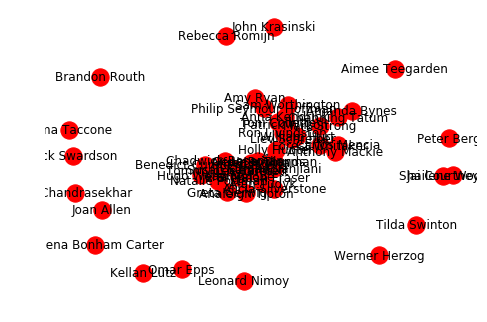

In [139]:
nx.draw(H, with_labels=True)

In [115]:
def egograph(name, t1, t2):
    hub_ego = nx.ego_graph(G, name)
    pos = nx.spring_layout(hub_ego)
    options = {
        'node_color': 'c',
        'node_size': 20,
        'line_color': 'grey',
        'linewidths': 0,
        'width': 0.1,
    }
    nx.draw(hub_ego, pos, with_labels=False, **options)
    nx.draw_networkx_nodes(hub_ego, pos, nodelist=[name], node_size=100, node_color='b')
    labels = {}
    for node in hub_ego:
        if boxofficesorted.index(node) < t1 and boxofficesorted.index(node) % t2 == 0 or node == name:
            labels[node] = node
    nx.draw_networkx_labels(hub_ego, pos, labels)

Samuel L. Jackson


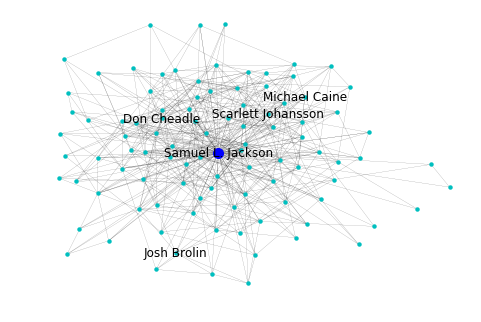

In [101]:
box1 = boxofficesorted[0]
print box1
egograph(box1, 70, 5)

John Goodman


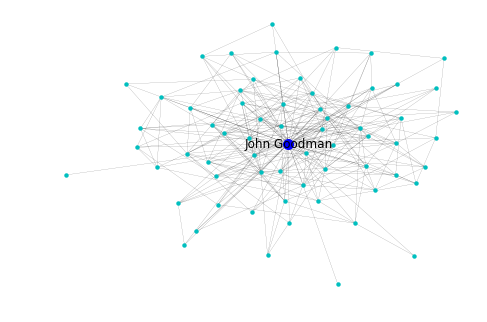

In [74]:
box100 = boxofficesorted[99]
print box100
egograph(box100)

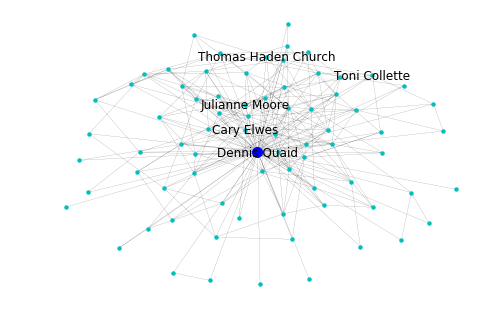

In [137]:
egograph("Dennis Quaid", 500, 20)

In [ ]:
egograph("")

David Spade


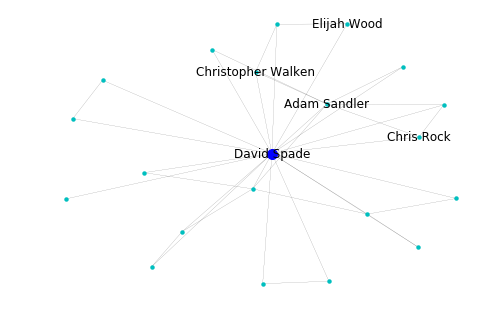

In [140]:
box400 = boxofficesorted[400]
print box400
egograph(box400, 500, 2)

Chace Crawford


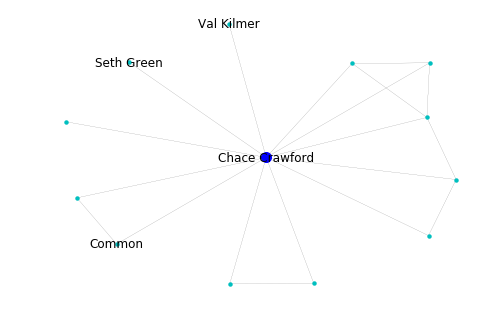

In [150]:
box800 = boxofficesorted[799]
print box800
egograph(box800, 600, 2)

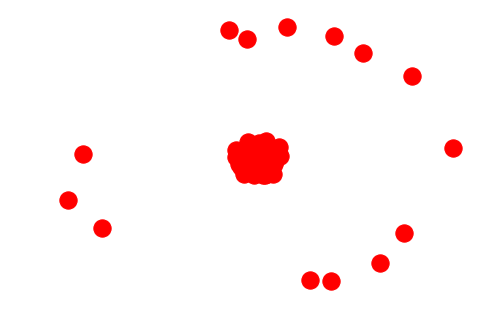

In [145]:
nx.draw(G, with_labels=False, font_weight='bold')

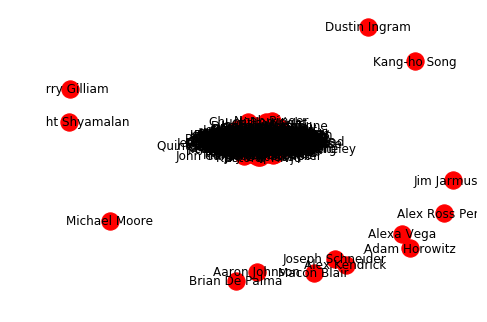

In [146]:
nx.draw(G, with_labels=True)

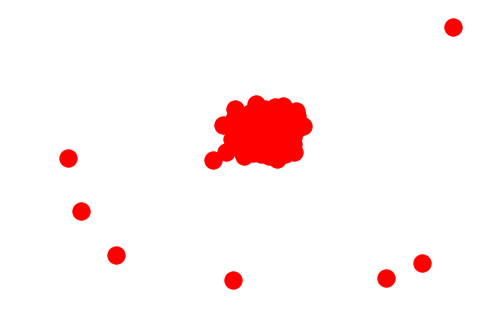

In [147]:
nx.draw(Gw)

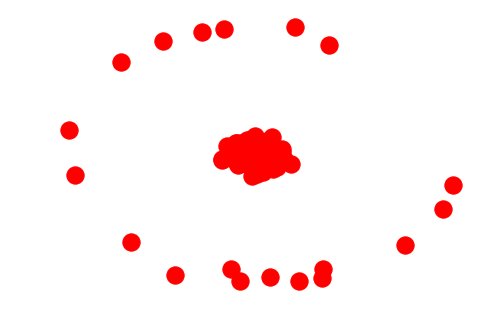

In [148]:
nx.draw(Gm)

In [153]:
degree_centrality = nx.degree_centrality(G)

In [154]:
sorted(degree_centrality, key=degree_centrality.get, reverse=True)

['Samuel L. Jackson',
 'Susan Sarandon',
 'Bruce Willis',
 'Morgan Freeman',
 'Nicole Kidman',
 'Anthony Hopkins',
 'Julianne Moore',
 'Michael Caine',
 'Liam Neeson',
 'Nicolas Cage',
 'Meryl Streep',
 'Ed Harris',
 'Alfred Molina',
 'Ewan McGregor',
 'Gary Oldman',
 'Alec Baldwin',
 'Dennis Quaid',
 'James Franco',
 'Ben Kingsley',
 'Matt Damon',
 'Colin Farrell',
 'Mark Wahlberg',
 'Willem Dafoe',
 'Woody Harrelson',
 'John Malkovich',
 'Cate Blanchett',
 'Julia Roberts',
 'Johnny Depp',
 'Kate Winslet',
 'Ben Affleck',
 'Matthew McConaughey',
 'Forest Whitaker',
 'Tom Hanks',
 'Seth Green',
 'John Goodman',
 'Toni Collette',
 'Will Ferrell',
 'Robert Downey Jr.',
 'Helen Mirren',
 'John Cusack',
 'Glenn Close',
 'Ralph Fiennes',
 'Billy Bob Thornton',
 'Rosario Dawson',
 'Owen Wilson',
 'Jennifer Aniston',
 'Michelle Pfeiffer',
 'Jessica Alba',
 'Angelina Jolie',
 'Naomi Watts',
 'John Leguizamo',
 'Charlize Theron',
 'Pierce Brosnan',
 'Greg Kinnear',
 'Christopher Walken',
 'Chri

In [155]:
eigenvector_centrality = nx.eigenvector_centrality(G)

In [156]:
sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)

['Morgan Freeman',
 'Susan Sarandon',
 'Anthony Hopkins',
 'Samuel L. Jackson',
 'Nicole Kidman',
 'Bruce Willis',
 'Julianne Moore',
 'Ed Harris',
 'Michael Caine',
 'Meryl Streep',
 'Colin Farrell',
 'Alec Baldwin',
 'Nicolas Cage',
 'Matt Damon',
 'Mark Wahlberg',
 'Cate Blanchett',
 'John Malkovich',
 'Liam Neeson',
 'Gary Oldman',
 'Willem Dafoe',
 'Julia Roberts',
 'Ewan McGregor',
 'Matthew McConaughey',
 'Kate Winslet',
 'Jude Law',
 'Woody Harrelson',
 'Angelina Jolie',
 'Christian Bale',
 'John Goodman',
 'Ralph Fiennes',
 'John Cusack',
 'Christopher Plummer',
 'Dennis Quaid',
 'Ben Kingsley',
 'Ben Affleck',
 'Tom Hanks',
 'Michelle Pfeiffer',
 'Billy Bob Thornton',
 'Helen Mirren',
 'Christopher Walken',
 'Glenn Close',
 'Alfred Molina',
 'Tommy Lee Jones',
 'Johnny Depp',
 'George Clooney',
 'Vince Vaughn',
 'Robert Duvall',
 'Robert Downey Jr.',
 'Kevin Spacey',
 'Brad Pitt',
 'Charlize Theron',
 'Michael Douglas',
 'Scarlett Johansson',
 'Kathy Bates',
 'Russell Crowe',

In [157]:
closeness_centrality = nx.closeness_centrality(G)

In [158]:
sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)

['Samuel L. Jackson',
 'Bruce Willis',
 'Susan Sarandon',
 'Nicole Kidman',
 'Morgan Freeman',
 'Julianne Moore',
 'Anthony Hopkins',
 'Liam Neeson',
 'Ed Harris',
 'Nicolas Cage',
 'Alfred Molina',
 'Alec Baldwin',
 'Michael Caine',
 'Willem Dafoe',
 'Gary Oldman',
 'Colin Farrell',
 'Woody Harrelson',
 'James Franco',
 'John Goodman',
 'Meryl Streep',
 'Ewan McGregor',
 'Matthew McConaughey',
 'Dennis Quaid',
 'Julia Roberts',
 'Jessica Alba',
 'Ben Kingsley',
 'Mark Wahlberg',
 'John Malkovich',
 'Rosario Dawson',
 'Matt Damon',
 'Cate Blanchett',
 'Forest Whitaker',
 'Pierce Brosnan',
 'Ralph Fiennes',
 'Billy Bob Thornton',
 'John Cusack',
 'Jack Black',
 'Angelina Jolie',
 'Ben Affleck',
 'Glenn Close',
 'Kate Winslet',
 'Christopher Walken',
 'Vince Vaughn',
 'Greg Kinnear',
 'Sigourney Weaver',
 'Toni Collette',
 'Paul Giamatti',
 'Robert Downey Jr.',
 'Tom Hanks',
 'Elizabeth Banks',
 'Tom Wilkinson',
 'Kirsten Dunst',
 'Tommy Lee Jones',
 'Jennifer Aniston',
 'Will Ferrell',


In [159]:
betweenness_centrality = nx.betweenness_centrality(G)

In [160]:
sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)

['Samuel L. Jackson',
 'Dennis Quaid',
 'Seth Green',
 'Alfred Molina',
 'Bruce Willis',
 'Liam Neeson',
 'Susan Sarandon',
 'Michael Caine',
 'Nicole Kidman',
 'James Franco',
 'Rosario Dawson',
 'Ben Kingsley',
 'Anthony Hopkins',
 'Forest Whitaker',
 'Nicolas Cage',
 'Julianne Moore',
 'Will Ferrell',
 'Seth Rogen',
 'Morgan Freeman',
 'Woody Harrelson',
 'Ewan McGregor',
 'Ron Perlman',
 'Tom Hanks',
 'Gary Oldman',
 'Toni Collette',
 'Elizabeth Banks',
 'Alec Baldwin',
 'Naomi Watts',
 'Willem Dafoe',
 'Salma Hayek',
 'Harrison Ford',
 'Mark Hamill',
 'Virginia Madsen',
 'Johnny Depp',
 'Helen Mirren',
 'Bryan Cranston',
 'Jennifer Aniston',
 'Julia Roberts',
 'Ed Harris',
 'Meryl Streep',
 'Cameron Diaz',
 'Brian Cox',
 'Tom Wilkinson',
 'Josh Brolin',
 'Jamie Foxx',
 'John Leguizamo',
 'Cate Blanchett',
 'Greg Kinnear',
 'John Malkovich',
 'Ben Affleck',
 'Pierce Brosnan',
 'Sigourney Weaver',
 'James Marsden',
 'Adam Sandler',
 'Jessica Alba',
 'Kevin Spacey',
 'Matthew McConau

In [161]:
cluster_coefficient = nx.algorithms.cluster.clustering(G)

In [162]:
sorted(cluster_coefficient, key=cluster_coefficient.get, reverse=True)

['Carlos Mencia',
 'Rosie Huntington-Whiteley',
 'Omar Sy',
 'Kate Upton',
 'Mary-Kate Olsen',
 'Brad Bird',
 'Morgan Spurlock',
 'Akiva Schaffer',
 'Callan McAuliffe',
 'Peter Mayhew',
 'Carrie Underwood',
 'Noah Ringer',
 'Mike Binder',
 'Lenny Kravitz',
 'Ellen Wong',
 'Jay Chou',
 'Nikki Blonsky',
 'Josh Zuckerman',
 'Macaulay Culkin',
 'Rob Reiner',
 'Shawn Wayans',
 'Anthony Daniels',
 'Zachary Gordon',
 'Ian McDiarmid',
 'Bel Powley',
 'Eli Roth',
 'Harold Ramis',
 'Leigh Whannell',
 'Kathryn Newton',
 'Jamie Harris',
 'Larry the Cable Guy',
 'Nia Vardalos',
 'Donnie Yen',
 'Corey Haim',
 'Eugenio Derbez',
 'Tony Jaa',
 'Whitney Houston',
 'Trey Parker',
 'Thomas Horn',
 'Roberto Benigni',
 'Jackson Rathbone',
 'Max Records',
 'Ron Howard',
 'Cody Horn',
 'Emily Ratajkowski',
 'Nick Jonas',
 'Mathieu Amalric',
 'Jorma Taccone',
 'Luke Bracey',
 'Chris Brown',
 'Jet Li',
 'Rhys Wakefield',
 'Melissa Benoist',
 'Sophie Cookson',
 'Brit Marling',
 'John Boyega',
 'Monica Bellucci',

In [42]:
effective_size = nx.algorithms.structuralholes.effective_size(G)

In [43]:
for i in range(10):
    print sorted(effective_size, key=effective_size.get, reverse=True)[i] + ","

Dustin Ingram,
Susan Sarandon,
Alfred Molina,
Forest Whitaker,
Tommy Lee Jones,
William Hurt,
Scarlett Johansson,
Mark Strong,
Lisa Kudrow,
Liev Schreiber,


In [44]:
sorted(effective_size, key=effective_size.get, reverse=True)

['Dustin Ingram',
 'Susan Sarandon',
 'Alfred Molina',
 'Forest Whitaker',
 'Tommy Lee Jones',
 'William Hurt',
 'Scarlett Johansson',
 'Mark Strong',
 'Lisa Kudrow',
 'Liev Schreiber',
 'Annette Bening',
 'Patrick Wilson',
 'Helena Bonham Carter',
 'Anna Kendrick',
 'Philip Seymour Hoffman',
 'Brendan Fraser',
 'Josh Hartnett',
 'Holly Hunter',
 'Anna Faris',
 'Ron Livingston',
 'Jena Malone',
 'Benedict Cumberbatch',
 'Tilda Swinton',
 'Joan Allen',
 'John Krasinski',
 'Gena Rowlands',
 'Naomie Harris',
 'Alan Tudyk',
 'Greta Gerwig',
 'Ioan Gruffudd',
 'Omar Epps',
 'Kumail Nanjiani',
 'Rebecca Romijn',
 'Aimee Teegarden',
 'Jorma Taccone',
 'Nick Swardson',
 'Leonard Nimoy',
 'Peter Berg',
 'Amanda Bynes',
 'Werner Herzog',
 'Jay Chandrasekhar',
 'Carlos Mencia',
 'Adam Horowitz',
 'Colin Farrell',
 'Toni Collette',
 'Charlize Theron',
 'Harrison Ford',
 'Natalie Portman',
 'Mickey Rourke',
 'Jonah Hill',
 'Carla Gugino',
 'Emily Blunt',
 'Kenneth Branagh',
 'Uma Thurman',
 'Ryan G

In [163]:
degree_centralities = []
for actor in actorlist:
    degree_centralities.append(degree_centrality.get(actor))

In [459]:
def fill(g):
    for a in actorlist:
        if a not in g:
            g.add_node(a)
    return g

In [464]:
fill(G2)
fill(G3)
fill(G4)

In [164]:
cluster_coefficients = [cluster_coefficient.get(x) for x in actorlist]
cluster_coefficients

[0.10052910052910052,
 0.07807807807807808,
 0.13636363636363635,
 0.07272727272727272,
 0.19444444444444445,
 0,
 0.027777777777777776,
 0.11666666666666667,
 0.06315789473684211,
 0.13230769230769232,
 0.07536231884057971,
 0.23809523809523808,
 0.09090909090909091,
 0.08392603129445235,
 0.0953058321479374,
 0.08064516129032258,
 0.1631578947368421,
 0.12895927601809956,
 0.12554112554112554,
 0.05228758169934641,
 0.24444444444444444,
 0.0928030303030303,
 0.12824858757062146,
 0.08403361344537816,
 0.07509881422924901,
 0.11219512195121951,
 0.09788359788359788,
 0.11578947368421053,
 0.10461538461538461,
 0.08673469387755102,
 0.12424242424242424,
 0,
 0.038461538461538464,
 0.1010752688172043,
 0.08262108262108261,
 0.16666666666666666,
 0.34545454545454546,
 0.07142857142857142,
 0.1761904761904762,
 0.11956521739130435,
 0.10952380952380952,
 0.1225296442687747,
 0.1021021021021021,
 0.25,
 0.1103448275862069,
 0.2222222222222222,
 0.11688311688311688,
 0.09415584415584416,
 0

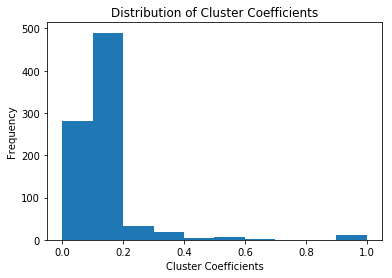

(1.0, 0.13634277285736673, 0.12672065199212285)

In [165]:
plot.hist(cluster_coefficients)
plot.title("Distribution of Cluster Coefficients")
plot.xlabel("Cluster Coefficients")
plot.ylabel("Frequency")
plot.show()
np.max(cluster_coefficients), np.mean(cluster_coefficients), np.std(cluster_coefficients)

In [48]:
effective_sizes = [0 if np.isnan(effective_size.get(x)) else effective_size.get(x) for x in actorlist]
effective_sizes

[25.285714285714285,
 34.189189189189186,
 10.5,
 10.272727272727273,
 7.444444444444445,
 0,
 8.777777777777779,
 22.2,
 18.8,
 22.692307692307693,
 42.608695652173914,
 5.571428571428571,
 10.090909090909092,
 34.89473684210526,
 34.473684210526315,
 29.5,
 16.9,
 45.42307692307692,
 19.363636363636363,
 17.11111111111111,
 7.8,
 30.03030303030303,
 52.43333333333334,
 32.142857142857146,
 21.347826086956523,
 36.51219512195122,
 25.357142857142858,
 17.8,
 23.384615384615383,
 44.83673469387755,
 39.53333333333333,
 1.0,
 12.538461538461538,
 27.967741935483872,
 24.85185185185185,
 3.5,
 7.545454545454545,
 7.5,
 17.476190476190474,
 21.25,
 18.80952380952381,
 20.304347826086957,
 33.32432432432432,
 6.25,
 26.8,
 8.0,
 19.545454545454547,
 50.82142857142857,
 9.727272727272727,
 27.64516129032258,
 39.57142857142857,
 15.444444444444445,
 1.0,
 21.64,
 61.231884057971016,
 32.08108108108108,
 52.932203389830505,
 16.6,
 4.666666666666667,
 29.857142857142858,
 28.696969696969695,

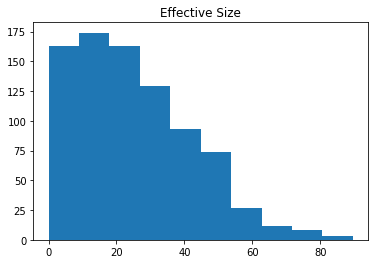

(89.61224489795919, 25.04723899159023, 17.190392087354777)

In [49]:
plot.hist(effective_sizes)
plot.title("Effective Size")
plot.show()
np.max(effective_sizes), np.mean(effective_sizes), np.std(effective_sizes)

In [50]:
len(actorw)

313

In [51]:
actorlist

['Abbie Cornish',
 'Abigail Breslin',
 'Adrianne Palicki',
 'Aimee Teegarden',
 'Alexa Davalos',
 'Alexa Vega',
 'Ali Larter',
 'Alice Eve',
 'Alicia Silverstone',
 'Alicia Vikander',
 'Allison Janney',
 'Amanda Bynes',
 'Amanda Crew',
 'Amanda Peet',
 'Amanda Seyfried',
 'Amber Heard',
 'America Ferrera',
 'Amy Adams',
 'Amy Ryan',
 'Amy Schumer',
 'Analeigh Tipton',
 'Angela Bassett',
 'Angelina Jolie',
 'Anna Faris',
 'Anna Friel',
 'Anna Kendrick',
 'Anna Paquin',
 'AnnaSophia Robb',
 'Anne Bancroft',
 'Anne Hathaway',
 'Annette Bening',
 'Ashley Bell',
 'Ashley Greene',
 'Ashley Judd',
 'Aubrey Plaza',
 'Barbra Streisand',
 'Bel Powley',
 'Bella Thorne',
 'Bette Midler',
 'Blake Lively',
 'Bonnie Hunt',
 'Bridget Moynahan',
 'Brie Larson',
 'Brit Marling',
 'Brittany Murphy',
 'Brooklyn Decker',
 'Bryce Dallas Howard',
 'Cameron Diaz',
 'Cara Delevingne',
 'Carey Mulligan',
 'Carla Gugino',
 'Carrie Fisher',
 'Carrie Underwood',
 'Carrie-Anne Moss',
 'Cate Blanchett',
 'Catherine 

In [52]:
degree_centralities

[0.03349282296650718,
 0.04425837320574162,
 0.014354066985645932,
 0.013157894736842105,
 0.010765550239234449,
 0.0,
 0.010765550239234449,
 0.029904306220095694,
 0.023923444976076555,
 0.03110047846889952,
 0.05502392344497607,
 0.008373205741626795,
 0.013157894736842105,
 0.045454545454545456,
 0.045454545454545456,
 0.03827751196172249,
 0.023923444976076555,
 0.06220095693779904,
 0.02631578947368421,
 0.021531100478468897,
 0.011961722488038277,
 0.039473684210526314,
 0.07177033492822966,
 0.04186602870813397,
 0.027511961722488036,
 0.04904306220095694,
 0.03349282296650718,
 0.023923444976076555,
 0.03110047846889952,
 0.05861244019138756,
 0.053827751196172245,
 0.0011961722488038277,
 0.01555023923444976,
 0.03708133971291866,
 0.03229665071770335,
 0.004784688995215311,
 0.013157894736842105,
 0.009569377990430622,
 0.025119617224880382,
 0.028708133971291863,
 0.025119617224880382,
 0.027511961722488036,
 0.04425837320574162,
 0.009569377990430622,
 0.03588516746411483,

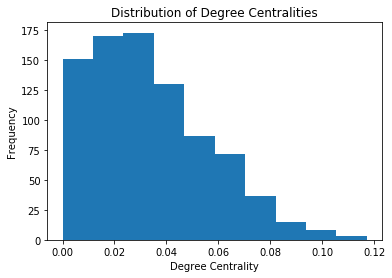

(0.11722488038277512, 0.03361724750302578, 0.02270481931673061)

In [166]:
plot.hist(degree_centralities)
plot.title("Distribution of Degree Centralities")
plot.xlabel("Degree Centrality")
plot.ylabel("Frequency")
plot.show()
np.max(degree_centralities), np.mean(degree_centralities), np.std(degree_centralities)

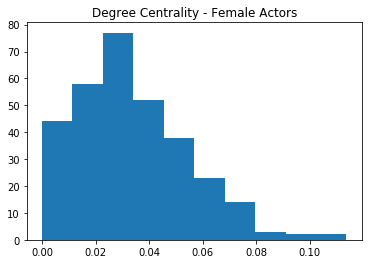

(0.03110047846889952, 0.033592185517526026, 0.020403695856263154)

In [54]:
plot.hist(degree_centralities[:313])
plot.title("Degree Centrality - Female Actors")
plot.show()
np.median(degree_centralities[:313]), np.mean(degree_centralities[:313]), np.std(degree_centralities[:313])

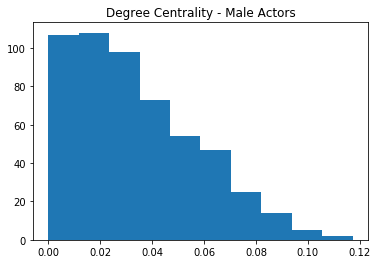

(0.028708133971291863, 0.03363196495417291, 0.02395331873545254)

In [55]:
plot.hist(degree_centralities[313:])
plot.title("Degree Centrality - Male Actors")
plot.show()
np.median(degree_centralities[313:]), np.mean(degree_centralities[313:]), np.std(degree_centralities[313:])

In [57]:
stats.ranksums(degree_centralities[313:], degree_centralities[:313])

RanksumsResult(statistic=-0.7738547458050635, pvalue=0.4390166936882922)

In [168]:
boxofficegross = []
for actor in actorlist:
    boxofficegross.append(boxofficedict[actor])

In [103]:
boxofficegross

[339.5,
 1103.9,
 210.4,
 10.2,
 278.7,
 369.5,
 552.7,
 571.5,
 445.6,
 368.0,
 1278.1,
 435.6,
 177.8,
 882.0,
 1088.2,
 854.7,
 728.1,
 2402.9,
 511.7,
 214.4,
 151.8,
 1801.4,
 2179.5,
 1566.8,
 169.4,
 1123.3,
 997.6,
 272.8,
 548.0,
 2568.3,
 970.0,
 56.2,
 1368.8,
 1086.2,
 178.6,
 995.4,
 25.9,
 324.9,
 754.6,
 538.6,
 1741.7,
 696.6,
 865.3,
 17.5,
 706.9,
 209.9,
 2009.3,
 3031.7,
 401.0,
 321.0,
 1419.1,
 2890.6,
 43.9,
 872.5,
 3481.2,
 1229.3,
 1666.4,
 493.7,
 269.4,
 1671.0,
 1117.1,
 743.7,
 307.9,
 552.9,
 100.6,
 154.9,
 579.5,
 21.5,
 1774.9,
 1548.5,
 556.5,
 1025.3,
 365.6,
 1307.8,
 2027.8,
 132.2,
 1614.6,
 266.4,
 3042.0,
 782.3,
 1805.4,
 686.6,
 912.6,
 730.9,
 31.5,
 64.0,
 1470.2,
 238.9,
 52.4,
 468.2,
 1593.4,
 1558.7,
 3207.9,
 363.1,
 203.5,
 623.8,
 873.4,
 995.8,
 1428.6,
 647.3,
 1448.0,
 360.0,
 406.2,
 132.5,
 1994.0,
 517.4,
 358.2,
 180.3,
 341.0,
 657.3,
 1388.2,
 711.2,
 188.2,
 2512.8,
 902.7,
 1988.1,
 338.4,
 1007.1,
 1630.0,
 2966.7,
 402.3,

In [167]:
plot.hist(boxofficegross)
plot.title("Distribution of Box Office Gross")
plot.xlabel("Box Office Gross")
plot.ylabel("Frequency")
plot.show()
np.median(boxofficegross), np.mean(boxofficegross), np.std(boxofficegross)

NameError: name 'boxofficegross' is not defined

(711.2, 918.4523961661341, 756.605094323478)

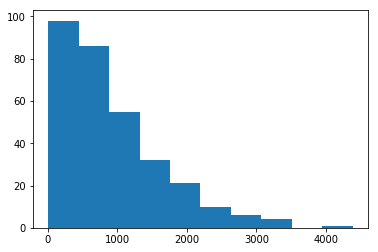

In [58]:
plot.hist(boxofficegross[:313])
np.median(boxofficegross[:313]), np.mean(boxofficegross[:313]), np.std(boxofficegross[:313])

(929.4, 1188.0893195121953, 1005.3994092890116)

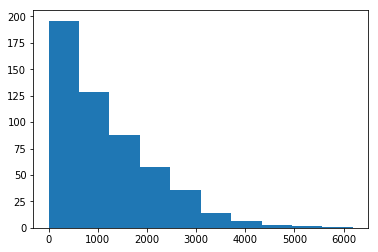

In [59]:
plot.hist(boxofficegross[313:])
np.median(boxofficegross[313:]), np.mean(boxofficegross[313:]), np.std(boxofficegross[313:])

In [61]:
stats.ranksums(boxofficegross[313:], boxofficegross[:313])

RanksumsResult(statistic=3.2383584495419955, pvalue=0.0012021966077676392)

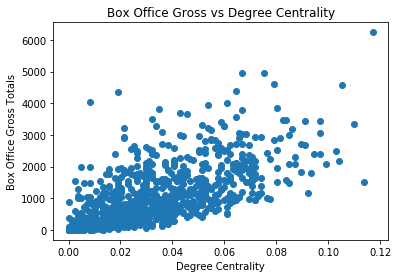

In [199]:
plot.plot(degree_centralities, boxofficegross, "o")
plot.title("Box Office Gross vs Degree Centrality")
plot.xlabel("Degree Centrality")
plot.ylabel("Box Office Gross Totals")
plot.show()

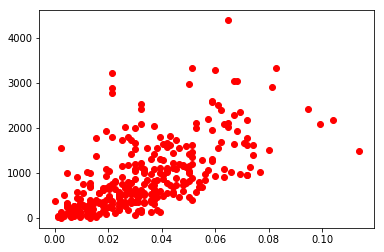

In [290]:
plot.plot(degree_centralities[:313], boxofficegross[:313], "ro")

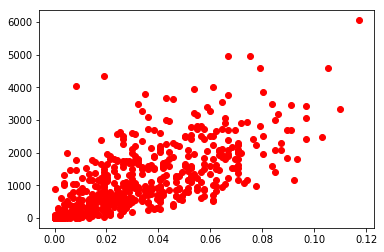

In [291]:
plot.plot(degree_centralities[313:], boxofficegross[313:], "ro")

In [546]:
x = np.array(effective_sizes)
y = np.array(boxofficegross)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
slope, intercept, r_value, p_value, std_err

(34.965528611102755,
 209.61041164919402,
 0.6478767020842304,
 7.479270399868731e-102,
 1.4150971274603956)

In [547]:
x = np.array(cluster_coefficients)
y = np.array(boxofficegross)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
slope, intercept, r_value, p_value, std_err

(-978.3354230590369,
 1218.7893276032248,
 -0.13362928951727887,
 9.678949205279193e-05,
 249.74816488582744)

In [201]:
x = np.array(degree_centralities)
y = np.array(boxofficegross)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
slope, intercept, r_value, p_value, std_err

(26715.74917738651,
 191.8724440107377,
 0.6512244015855704,
 3.1105670255134076e-103,
 1071.6218595093471)

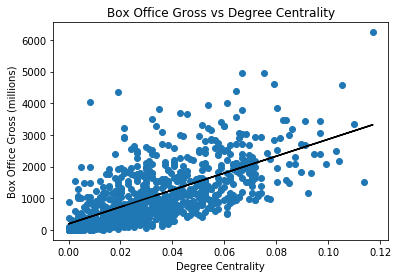

In [202]:
plot.figure()
plot.plot(x, y, "o")
yfit = [intercept + slope * xi for xi in x]
plot.plot(x, yfit, "black")
plot.title("Box Office Gross vs Degree Centrality")
plot.xlabel("Degree Centrality")
plot.ylabel("Box Office Gross (millions)")
plot.show()

In [294]:
xw = np.array(degree_centralities[:313])
yw = np.array(boxofficegross[:313])
slope, intercept, r_value, p_value, std_err = stats.linregress(xw,yw)
slope, intercept, r_value, p_value, std_err

(22773.953953269727,
 150.38525440924798,
 0.6162295562278675,
 4.0604666397467075e-34,
 1650.4524000894407)

In [295]:
xm = np.array(degree_centralities[313:])
ym = np.array(boxofficegross[313:])
slope, intercept, r_value, p_value, std_err = stats.linregress(xm,ym)
slope, intercept, r_value, p_value, std_err

(28239.675167545847,
 235.46882600509434,
 0.6746332331723333,
 4.953529513793553e-72,
 1340.883830606657)

In [564]:
def genderstats(x):
    xm = np.array(x[313:])
    ym = np.array(boxofficegross[313:])
    slopem, interceptm, r_valuem, p_valuem, std_errm = stats.linregress(xm,ym)
    xw = np.array(x[:313])
    yw = np.array(boxofficegross[:313])
    slopew, interceptw, r_valuew, p_valuew, std_errw = stats.linregress(xw,yw)
    print p_valuew, p_valuem
    print r_valuew, r_valuem
    print np.mean(x[:313]), np.std(x[:313])
    print np.mean(x[313:]), np.std(x[313:])
    print ""
    

In [120]:
def genderranksum(x):
    xm = np.array(x[313:])
    xf = np.array(x[:313])
    print stats.ranksums(xm, xf)

In [121]:
for x in [degree_centralities, eigenvector_centralities, closeness_centralities, betweenness_centralities, cluster_coefficients]:
    genderranksum(x)

RanksumsResult(statistic=-0.7738547458050635, pvalue=0.4390166936882922)
RanksumsResult(statistic=-0.8432117141732071, pvalue=0.3991100481386398)
RanksumsResult(statistic=-0.7853656712275076, pvalue=0.4322392020780529)
RanksumsResult(statistic=-0.5130375748408263, pvalue=0.6079250369864091)
RanksumsResult(statistic=-0.5669495040345514, pvalue=0.57074848938715)


In [565]:
print np.mean(boxofficegross[:313]), np.std(boxofficegross[:313])
print np.mean(boxofficegross[313:]), np.std(boxofficegross[313:])

915.4121405750799 754.0580051879759
1185.2245915572232 1002.6691645371056


In [566]:
genderstats(degree_centralities)

4.0604666397467075e-34 4.953529513793553e-72
0.6162295562278675 0.6746332331723333
0.033592185517526026 0.020403695856263154
0.03363196495417291 0.02395331873545254



In [567]:
genderstats(eigenvector_centralities)
genderstats(closeness_centralities)
genderstats(betweenness_centralities)
genderstats(effective_sizes)
genderstats(cluster_coefficients)

8.881148860682634e-36 1.10028089199159e-67
0.6282724491162226 0.6589749231950947
0.027118775279145434 0.019706768875767333
0.027184466135186592 0.022264293322174604

1.1864526414013213e-22 1.089399285438738e-34
0.5155481957548892 0.4975931494433592
0.4071452399282882 0.045827719982559516
0.39660615330962995 0.07668945067804152

3.6448535384443484e-20 2.882280313691513e-53
0.48836614798933076 0.5992644105747506
0.0015524205437754159 0.001628490641369571
0.0017375309178390389 0.0020876044516638962

4.371401713430756e-33 1.9590354601880674e-71
0.6084715412599625 0.6725379859387126
25.006906295881315 15.415244337683047
25.070924045543123 18.152066766036665

0.006536451715835504 0.0024455767868259985
-0.1534225763190612 -0.1309853050296202
0.13407635973090024 0.11584673306951321
0.1376737058941097 0.13267358248359207



In [215]:
academynominated = []
for a in actorlist:
    if a in academylist:
        academynominated.append(1)
    else:
        academynominated.append(0)

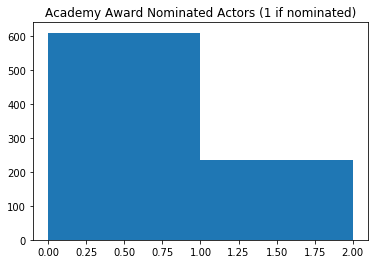

In [474]:
plot.hist(academynominated, bins=[0,1,2])
plot.title("Academy Award Nominated Actors (1 if nominated)")
plot.show()

In [180]:
nx.write_gexf(G, "graph.gexf")

In [175]:
eigenvector_centralities = []
for actor in actorlist:
    eigenvector_centralities.append(eigenvector_centrality.get(actor))

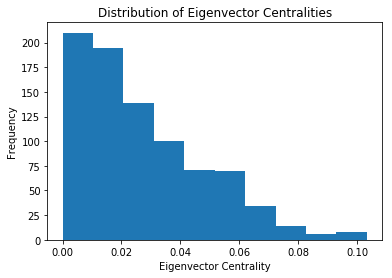

(0.10329915207232698, 0.027160162071426682, 0.021353822939292118)

In [177]:
plot.hist(eigenvector_centralities)
plot.title("Distribution of Eigenvector Centralities")
plot.xlabel("Eigenvector Centrality")
plot.ylabel("Frequency")
plot.show()
np.max(eigenvector_centralities), np.mean(eigenvector_centralities), np.std(eigenvector_centralities)

In [308]:
x_e = np.array(eigenvector_centralities)
y = np.array(boxofficegross)
slope, intercept, r_value, p_value, std_err = stats.linregress(x_e,y)
slope, intercept, r_value, p_value, std_err

(27909.694825721712,
 327.36852840811036,
 0.6423876858512334,
 1.261573773897872e-99,
 1146.1216856794063)

In [170]:
betweenness_centralities = []
for actor in actorlist:
    betweenness_centralities.append(betweenness_centrality.get(actor))
x_b = np.array(betweenness_centralities)
y = np.array(boxofficegross)
slope, intercept, r_value, p_value, std_err = stats.linregress(x_b,y)
slope, intercept, r_value, p_value, std_err 

(275312.3461316053,
 630.4738514755236,
 0.5712261046696787,
 1.967261946875776e-74,
 13616.95270931216)

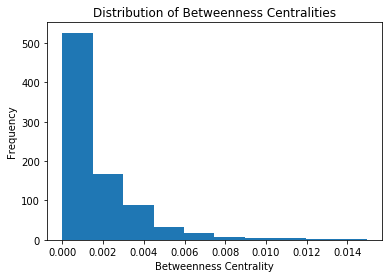

(0.01494281387712571, 0.0016690444555672729, 0.0019325783103463447)

In [171]:
plot.hist(betweenness_centralities)
plot.title("Distribution of Betweenness Centralities")
plot.xlabel("Betweenness Centrality")
plot.ylabel("Frequency")
plot.show()
np.max(betweenness_centralities), np.mean(betweenness_centralities), np.std(betweenness_centralities)

In [173]:
closeness_centralities = []
for actor in actorlist:
    closeness_centralities.append(closeness_centrality.get(actor))
x_c = np.array(closeness_centralities)
y = np.array(boxofficegross)
slope, intercept, r_value, p_value, std_err = stats.linregress(x_c,y)
slope, intercept, r_value, p_value, std_err 

(6690.217603992005,
 -1589.485655159316,
 0.4822690335570512,
 1.725162680630836e-50,
 418.3070964677117)

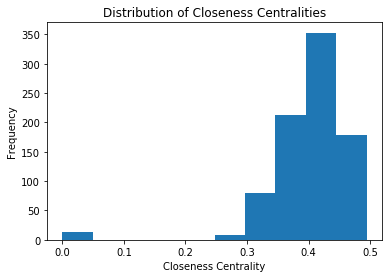

(0.49463552616937917, 0.4005053662075496, 0.06714348442896945)

In [174]:
plot.hist(closeness_centralities)
plot.title("Distribution of Closeness Centralities")
plot.xlabel("Closeness Centrality")
plot.ylabel("Frequency")
plot.show()
np.max(closeness_centralities), np.mean(closeness_centralities), np.std(closeness_centralities)

In [543]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, academynominated)
slope, intercept, r_value, p_value, std_err

(9.65574147359557,
 -0.04563964006838861,
 0.4888246787129123,
 5.062182773181175e-52,
 0.5931547345759991)

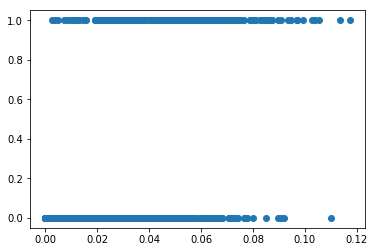

In [317]:
plot.plot(x, academynominated, "o")

In [318]:
print np.corrcoef(x, x_e)[0,1]
print np.corrcoef(x, x_b)[0,1]
print np.corrcoef(x, x_c)[0,1]

0.977878748992735
0.8824767738466188
0.7264652570016474


In [195]:
moviecounts = []
for actor in actorlist:
    c = float(moviecountdict.get(actor))/4
    moviecounts.append(c)

In [196]:
xc = np.array(moviecounts)
yc = np.array(boxofficegross)
slope, intercept, r_value, p_value, std_err = stats.linregress(xc,yc)
slope, intercept, r_value, p_value, std_err

(3.496182632867174,
 995.7776313149838,
 0.09399872861167262,
 0.006217740104810381,
 1.2745994316204892)

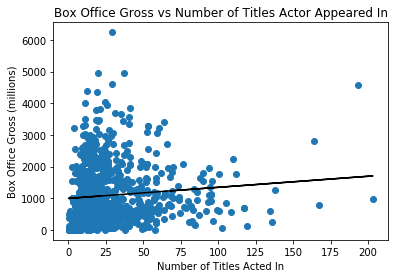

In [198]:
plot.figure()
plot.plot(moviecounts, boxofficegross, "o")
plot.plot(moviecounts, [slope*x + intercept for x in moviecounts], "black")
plot.title("Box Office Gross vs Number of Titles Actor Appeared In")
plot.xlabel("Number of Titles Acted In")
plot.ylabel("Box Office Gross (millions)")
plot.show()

In [212]:
import statsmodels.api as sm
import pandas as pd

In [205]:
female = [1 if x in Gw.nodes() else 0 for x in actorlist]

In [209]:
oldage = [1 if x in old else 0 for x in actorlist]

In [210]:
age = [agedict[x] for x in actorlist]

In [216]:
df = pd.DataFrame(
    {
        'degree_centralities': degree_centralities,
        'eigenvector_centralities': eigenvector_centralities,
        'betweenness_centralities': betweenness_centralities,
        'closeness_centralities': closeness_centralities,
        'cluster_coefficients': cluster_coefficients,
        'moviecount': moviecounts,
        'boxofficegross': boxofficegross,
        'academynominated': academynominated,
        'female': female,
        'oldage': oldage,
        'age': age
    })

In [418]:
df.corr()

,academynominated,betweenness_centralities,boxofficegross,closeness_centralities,cluster_coefficients,degree_centralities,effective_size,eigenvector_centralities,moviecount
academynominated,1.000000,0.370475,0.367458,0.337366,-0.097874,0.488825,0.480947,0.535178,-0.038391
betweenness_centralities,0.370475,1.000000,0.571010,0.552060,-0.219305,0.882477,0.891374,0.822070,0.229752
boxofficegross,0.367458,0.571010,1.000000,0.482151,-0.133629,0.651258,0.647877,0.642388,0.093565
closeness_centralities,0.337366,0.552060,0.482151,1.000000,-0.123762,0.726465,0.722787,0.691832,0.205754
cluster_coefficients,-0.097874,-0.219305,-0.133629,-0.123762,1.000000,-0.265519,-0.282547,-0.218559,-0.107014
degree_centralities,0.488825,0.882477,0.651258,0.726465,-0.265519,1.000000,0.999078,0.977879,0.182641
effective_size,0.480947,0.891374,0.647877,0.722787,-0.282547,0.999078,1.000000,0.970960,0.188109
eigenvector_centralities,0.535178,0.822070,0.642388,0.691832,-0.218559,0.977879,0.970960,1.000000,0.125665
moviecount,-0.038391,0.229752,0.093565,0.205754,-0.107014,0.182641,0.188109,0.125665,1.000000


In [419]:
df[:313].corr()

,academynominated,betweenness_centralities,boxofficegross,closeness_centralities,cluster_coefficients,degree_centralities,effective_size,eigenvector_centralities,moviecount
academynominated,1.000000,0.360748,0.362463,0.394778,-0.105920,0.479316,0.472827,0.517249,-0.073323
betweenness_centralities,0.360748,1.000000,0.488366,0.670076,-0.232353,0.885970,0.894148,0.825432,0.154771
boxofficegross,0.362463,0.488366,1.000000,0.515548,-0.153423,0.616230,0.608472,0.628272,-0.000673
closeness_centralities,0.394778,0.670076,0.515548,1.000000,-0.276508,0.846559,0.844131,0.816411,0.167187
cluster_coefficients,-0.105920,-0.232353,-0.153423,-0.276508,1.000000,-0.280882,-0.300443,-0.222761,-0.105153
degree_centralities,0.479316,0.885970,0.616230,0.846559,-0.280882,1.000000,0.998972,0.976541,0.137683
effective_size,0.472827,0.894148,0.608472,0.844131,-0.300443,0.998972,1.000000,0.969128,0.143306
eigenvector_centralities,0.517249,0.825432,0.628272,0.816411,-0.222761,0.976541,0.969128,1.000000,0.070473
moviecount,-0.073323,0.154771,-0.000673,0.167187,-0.105153,0.137683,0.143306,0.070473,1.000000


In [420]:
df[313:].corr()

,academynominated,betweenness_centralities,boxofficegross,closeness_centralities,cluster_coefficients,degree_centralities,effective_size,eigenvector_centralities,moviecount
academynominated,1.000000,0.390766,0.403791,0.326117,-0.092962,0.501978,0.493447,0.552636,-0.014934
betweenness_centralities,0.390766,1.000000,0.599264,0.531288,-0.215732,0.883333,0.892409,0.823744,0.255674
boxofficegross,0.403791,0.599264,1.000000,0.497593,-0.130985,0.674633,0.672538,0.658975,0.120259
closeness_centralities,0.326117,0.531288,0.497593,1.000000,-0.078167,0.703959,0.699839,0.668666,0.224667
cluster_coefficients,-0.092962,-0.215732,-0.130985,-0.078167,1.000000,-0.258887,-0.274861,-0.216718,-0.108927
degree_centralities,0.501978,0.883333,0.674633,0.703959,-0.258887,1.000000,0.999125,0.978692,0.201296
effective_size,0.493447,0.892409,0.672538,0.699839,-0.274861,0.999125,1.000000,0.972023,0.206587
eigenvector_centralities,0.552636,0.823744,0.658975,0.668666,-0.216718,0.978692,0.972023,1.000000,0.149340
moviecount,-0.014934,0.255674,0.120259,0.224667,-0.108927,0.201296,0.206587,0.149340,1.000000


In [324]:
X = df[['degree_centralities', 'eigenvector_centralities', 'betweenness_centralities', 'closeness_centralities', 'moviecount']]

In [325]:
X = sm.add_constant(X) # adding a constant
Y = boxofficegross
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     124.5
Date:                Fri, 15 Mar 2019   Prob (F-statistic):           1.25e-98
Time:                        16:11:06   Log-Likelihood:                -6746.3
No. Observations:                 846   AIC:                         1.350e+04
Df Residuals:                     840   BIC:                         1.353e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [390]:
df1 = pd.DataFrame(
    {
        'degree_centralities': degree_centralities,
        'eigenvector_centralities': eigenvector_centralities,
        'betweenness_centralities': betweenness_centralities,
        'closeness_centralities': closeness_centralities,
        'moviecount': moviecounts,
    })

In [392]:
Xnorm = (df1-df1.min())/(df1.max()-df1.min()) # adding a constant
Y = boxofficegross
model = sm.OLS(Y, Xnorm).fit()
predictions = model.predict(Xnorm) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     525.3
Date:                Sat, 16 Mar 2019   Prob (F-statistic):          8.34e-256
Time:                        00:17:44   Log-Likelihood:                -6746.5
No. Observations:                 846   AIC:                         1.350e+04
Df Residuals:                     841   BIC:                         1.353e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
betweenness_centralities

In [393]:
Y2 = academynominated
model2 = sm.OLS(Y2, Xnorm).fit()
predictions2 = model2.predict(Xnorm) 
print_model2 = model2.summary()
print(print_model2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     173.7
Date:                Sat, 16 Mar 2019   Prob (F-statistic):          7.08e-127
Time:                        00:19:50   Log-Likelihood:                -360.37
No. Observations:                 846   AIC:                             730.7
Df Residuals:                     841   BIC:                             754.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
betweenness_centralities

In [395]:
X2 = df[['degree_centralities', 'eigenvector_centralities', 'betweenness_centralities', 'closeness_centralities', 'moviecount']]
X2 = sm.add_constant(X2) # adding a constant
Y2 = academynominated
model2 = sm.OLS(Y2, X2).fit()
predictions2 = model2.predict(X2) 
print_model2 = model2.summary()
print(print_model2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     78.24
Date:                Sat, 16 Mar 2019   Prob (F-statistic):           2.13e-67
Time:                        00:24:36   Log-Likelihood:                -360.30
No. Observations:                 846   AIC:                             732.6
Df Residuals:                     840   BIC:                             761.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [396]:
predictions2bin = [1 if x >= 0.5 else 0 for x in predictions2]
wrong = [0 if predictions2bin[i] == academynominated[i] else 1 for i in range(834)]
print sum(predictions2bin), sum(academynominated)
print sum(wrong), len(wrong)
print float(sum(wrong))/len(wrong), 1-float(sum(wrong))/len(wrong)
print float(sum(academynominated))/len(academynominated)

156 236
157 834
0.18824940048 0.81175059952
0.278959810875


In [330]:
from sklearn.metrics import confusion_matrix

In [332]:
tn, fp, fn, tp = confusion_matrix(academynominated, predictions2bin).ravel()
tn, fp, fn, tp

(570, 40, 120, 116)

In [577]:
X2e = df[['eigenvector_centralities', 'moviecount']] #, 'eigenvector_centralities', 'betweenness_centralities', 'closeness_centralities', 'moviecount']]
X2e = sm.add_constant(X2e) # adding a constant
Y2e = academynominated
model2e = sm.OLS(Y2, X2e).fit()
predictions2e = model2e.predict(X2e) 
print_model2e = model2e.summary()
print(print_model2e)

In [578]:
def awardstats(x):
    X = sm.add_constant(df[x])
    model = sm.OLS(academynominated, X).fit()
    pred = model.predict(X)
    predbin = [1 if x >= 0.5 else 0 for x in pred]
    tn, fp, fn, tp = confusion_matrix(academynominated, predbin).ravel()
    print measures(tn, fp, fn, tp)

In [334]:
predictions2ebin = [1 if x >= 0.5 else 0 for x in predictions2e]
wrong = [0 if predictions2ebin[i] == academynominated[i] else 1 for i in range(834)]
print sum(predictions2ebin), sum(academynominated)
print sum(wrong), len(wrong)
print float(sum(wrong))/len(wrong), 1-float(sum(wrong))/len(wrong)

162 236
167 834
0.200239808153 0.799760191847


In [335]:
tn2, fp2, fn2, tp2 = confusion_matrix(academynominated, predictions2ebin).ravel()
tn2, fp2, fn2, tp2

(562, 48, 122, 114)

In [584]:
def measures(tn, fp, fn, tp):
    accuracy = float(tn + tp)/(tn+fp+fn+tp)
    recall = float(tp)/(tp + fn)
    specificity = float(tn)/(tn + fp)
    precision = np.nan if tp+fp==0 else float(tp)/(tp + fp)
    return "accuracy: %f, recall: %f, specificity: %f, precision: %f" % (accuracy, recall, specificity, precision)

In [585]:
print measures(tn, fp, fn, tp)

accuracy: 0.810875, recall: 0.491525, specificity: 0.934426, precision: 0.743590


In [586]:
print measures(tn2, fp2, fn2, tp2)

accuracy: 0.799054, recall: 0.483051, specificity: 0.921311, precision: 0.703704


In [587]:
awardstats('degree_centralities')
awardstats('eigenvector_centralities')
awardstats('closeness_centralities')
awardstats('betweenness_centralities')
awardstats('effective_size')
awardstats('cluster_coefficients')
awardstats('moviecount')

accuracy: 0.788416, recall: 0.427966, specificity: 0.927869, precision: 0.696552
accuracy: 0.797872, recall: 0.466102, specificity: 0.926230, precision: 0.709677
accuracy: 0.721040, recall: 0.000000, specificity: 1.000000, precision: nan
accuracy: 0.748227, recall: 0.216102, specificity: 0.954098, precision: 0.645570
accuracy: 0.778960, recall: 0.406780, specificity: 0.922951, precision: 0.671329
accuracy: 0.721040, recall: 0.000000, specificity: 1.000000, precision: nan
accuracy: 0.721040, recall: 0.000000, specificity: 1.000000, precision: nan


In [96]:
def getarr(graph, alist):
    degree = nx.degree_centrality(graph)
    degrees = [degree.get(a) for a in alist]
    eigenvector = nx.eigenvector_centrality(graph)
    eigenvectors = [eigenvector.get(a) for a in alist]
    close = nx.closeness_centrality(graph)
    closes = [close.get(a) for a in alist]
    between = nx.betweenness_centrality(graph)
    betweens = [between.get(a) for a in alist]
    effective = nx.algorithms.structuralholes.effective_size(graph)
    effectives = [effective.get(a) for a in alist]
    cluster = nx.algorithms.cluster.clustering(graph)
    clusters = [cluster.get(a) for a in alist]
    return [degrees, eigenvectors, closes, betweens, effectives, clusters]

In [600]:
arr2 = getarr(G2, actorlist)

In [607]:
arr2[4] = [0 if np.isnan(a) else a for a in arr2[4]]

In [595]:
arr3 = getarr(G3, actorlist)

In [609]:
arr3[4] = [0 if np.isnan(a) else a for a in arr3[4]]

In [596]:
arr4 = getarr(G4, actorlist)

In [610]:
arr4[4] = [0 if np.isnan(a) else a for a in arr4[4]]

In [97]:
arrold = getarr(G, old)

In [98]:
arryoung = getarr(G, young)

In [100]:
def regs(arrs, box):
    for arr in arrs:
        slope, intercept, r_value, p_value, std_err = stats.linregress(arr,box)
        print p_value, r_value

In [615]:
regs(arr2, boxofficegross)

1.1942828985848178e-76 0.5782557542454051
1.4869211524451096e-52 0.49106779815494656
1.2849846958555252e-40 0.43623716805644397
1.4028621454226688e-52 0.49117393542144083
1.5705954665332382e-76 0.5778828184716102
0.6924055386210672 -0.013620263799994916


In [616]:
regs(arr3, boxofficegross)

1.3458310844075957e-25 0.3487235854251333
0.2090311067021773 0.043233945935603
1.758076211363207e-21 0.3191275506757823
2.6752502829315966e-15 0.26722358331621515
6.595193983518497e-25 0.34397935238808613
0.00024360182336535363 0.1258235981381525


In [617]:
regs(arr4, boxofficegross)

3.138236224411416e-09 0.2018760349814726
0.7895609453344083 0.009188943245072292
3.5675029354559526e-06 0.15858332426045516
6.558288874160435e-05 0.136796370440501
1.3341909204585716e-09 0.20651223591887174
0.013639207007327084 0.08477704425096401


In [105]:
regs(arrold, [boxofficedict.get(a) for a in old])

2.369616309856973e-54 0.6513575170399478
1.4386542752637303e-50 0.6331870740463253
1.423820840526889e-29 0.5033337769144175
4.878548427665552e-42 0.5871979671423805
nan nan
0.018904247699825644 -0.11200255739844389


In [106]:
regs(arryoung, [boxofficedict.get(a) for a in young])

2.2089227005382895e-36 0.5696161238015546
6.497328432411939e-36 0.5664557836806415
2.3068434934662702e-18 0.41487815815140977
2.0676537162227374e-20 0.4370054343302428
nan nan
0.001915368918007451 -0.15337320368569549


In [122]:
for i in range(len(arrold)):
    print stats.ranksums(arrold[i], arryoung[i])

RanksumsResult(statistic=6.627676995021597, pvalue=3.410106360846091e-11)
RanksumsResult(statistic=7.363334639509686, pvalue=1.7937195769004525e-13)
RanksumsResult(statistic=6.761714521825934, pvalue=1.3636820863228913e-11)
RanksumsResult(statistic=5.939608304377904, pvalue=2.857038778316743e-09)
RanksumsResult(statistic=6.978962319997249, pvalue=2.9736821165254243e-12)
RanksumsResult(statistic=-0.7487516465813704, pvalue=0.45400690852033276)


In [69]:
arrtop = getarr(G, Gtop.nodes())

In [654]:
arrtop[4] = [0 if np.isnan(a) else a for a in arrtop[4]]

In [63]:
boxtop = [boxofficedict.get(a) for a in Gtop.nodes()]

In [655]:
regs(arrtop, boxtop)

1.107287946239183e-23 0.5937316713842392
9.185233244477442e-22 0.5723525353745975
1.2527647672707395e-19 0.54658285980075
2.8301042637835596e-19 0.5420864797892588
1.2334840653308114e-23 0.5932277955017567
0.006099597493946928 -0.1787856036741758


In [ ]:
arrlow = getarr(G, Glow.nodes())
arrlow[4] = [0 if np.isnan(a) else a for a in arrlow[4]]
boxlow = [boxofficedict.get(a) for a in Glow.nodes()]
regs(arrlow, boxlow)

In [68]:
stats.ranksums(boxtop, boxlow)

RanksumsResult(statistic=10.843096018595832, pvalue=2.1506718422481736e-27)

In [70]:
for i in range(len(arrlow)):
    print stats.ranksums(arrlow[i], arrtop[i])

RanksumsResult(statistic=-13.624512457716794, pvalue=2.8631593963018962e-42)
RanksumsResult(statistic=-14.693626370176988, pvalue=7.08200570940644e-49)
RanksumsResult(statistic=-13.48673183580409, pvalue=1.8721717125122318e-41)
RanksumsResult(statistic=-11.609888982627918, pvalue=3.670919020467895e-31)
RanksumsResult(statistic=-13.461405686805108, pvalue=2.6384848647379784e-41)
RanksumsResult(statistic=0.5066822639356192, pvalue=0.6123777770869001)


In [636]:
lowdict = {}
for (u, v) in G.edges():
    if u in academylist and v not in academylist:
        if v in lowdict:
            lowdict[v] += 1
        else:
            lowdict[v] = 1
    elif v in academylist and u not in academylist:
        if u in lowdict:
            lowdict[u] += 1
        else:
            lowdict[u] = 1
low = [1 if a in lowdict else 0 for a in Glow.nodes()]
slope, intercept, r_value, p_value, std_err = stats.linregress(low,boxlow)
print p_value, r_value

4.798683916840757e-09 0.23552076225642923


In [643]:
sum(low), len(low), np.mean(low)

(550, 603, 0.912106135986733)

In [639]:
low2 = [lowdict.get(a) if a in lowdict else 0 for a in Glow.nodes()]
slope, intercept, r_value, p_value, std_err = stats.linregress(low2,boxlow)
print p_value, r_value

1.2540920339313867e-46 0.5384368883016878


In [644]:
sum(low2), np.mean(low2), np.std(low2)

(4840, 8.02653399668325, 7.366228286190099)

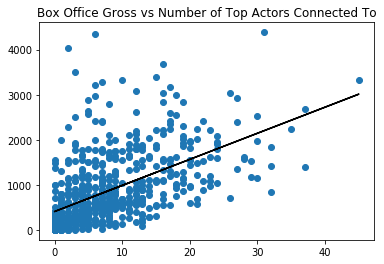

In [647]:
plot.figure()
plot.plot(low2, boxlow, "o")
plot.plot(low2, [slope*x + intercept for x in low2], "black")
plot.title("Box Office Gross vs Number of Top Actors Connected To")
plot.show()

In [651]:
top2 = [Gtop.degree[a] for a in Gtop.nodes()]
slope, intercept, r_value, p_value, std_err = stats.linregress(top2,boxtop)
print p_value, r_value

2.0591978352145025e-17 0.5172611387107177


In [652]:
np.mean(top2), np.std(top2)

(22.34188034188034, 10.585558936720155)